# <div style="text-align: center;"><h1 style="font-variant: small-caps; color: blue;display: inline-block;font-size: 35px">**Predicting Property Prices in Bengaluru**</h1></div>

Potential home buyers consider factors such as location, property size, proximity to essential
amenities (offices, schools, parks, restaurants, hospitals), and most importantly, the price when
purchasing a house.

To address this, a dataset containing nine features, including Area Type, Availability, Location, Price, Size, Society, Total Sqft, Bath, and Balcony, has been compiled. The objective is to build a predictive model to estimate property prices in Bengaluru based on these features.

<div style="text-align: center"><img src="imgs/united_highlands-marathahalli-bengaluru-united_infrastructures.jpeg" alt="house" width="100%" height="60%"></div>

**Data Dictionary**
___

- **area_type:** where the property is located (e.g. "Super built-up Area," "Built-up Area," "Plot Area")
- **availability:** Indicates when the property is available for possession (e.g., 19-Dec, Ready To Move)
- **location:** The area where the property is located (e.g. "Electronic City Phase II," "Kothanur").
- **size:** The number of bedrooms/rooms  in the property (e.g. "2 BHK", "4 Bedroom")
- **society:** Name of the housing society or complex to which the property belongs.
- **total_sqft:** Total area of the property in square feet (sqft).
- **bath:** Number of bathrooms in the property.
- **balcony:** Number of balconies in the property.
- **price:** Price of the property in lakhs (Indian currency, ₹).

#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="table-of-contents">TABLE OF CONTENTS</div>**

- [Import Libraries](#import-libraries)  
- [Retrieve The Dataset](#retrieve-the-dataset)  
    - [Create The Dataframe](#create-the-dataframe)  
        - [From Google Drive](#from-google-drive)  
        - [From Local Folder](#from-local-folder)  
    - [Create A Backup Dataframe](#create-a-backup-dataframe)  
- [Data Inspection](#data-inspection)  
    - [Dataframe Size](#dataframe-size)  
    - [Identify Datatypes](#identify-datatypes)  
    - [Descriptive Statistics](#descriptive-statistics)  
        - [Numerical Stats](#numerical-stats)  
        - [Categorical Stats](#categorical-stats)  
    - [Missing Values](#missing-values)  
- [Data Preprocessing & Cleanup](#data-preprocessing-&-cleanup)  
    - [Resolving Data Gaps](#resolving-data-gaps)  
        - [Discarding Data](#discarding-data)  
        - [Data Imputation](#data-imputation)  
- [Data Manipulation / Feature Engineering](#data-manipulation-/-feature-engineering)  
    - [Total Square Feet Column](#total-square-feet-column)  
        - [Identify All Metrics (I.E. Acres)](#identify-all-metrics-(i.e.-acres))  
        - [Value Conversion To Square Feet](#value-conversion-to-square-feet)  
        - [Convert The Total_sqft Column From Categorical To Numerical](#convert-the-total_sqft-column-from-categorical-to-numerical)  
    - [Size Column](#size-column)  
    - [Price Per Square Feet Column](#price-per-square-feet-column)  
    - [Availability Column](#availability-column)  
        - [Standardize The Data](#standardize-the-data)  
        - [Convert The Availability Column Datatype](#convert-the-availability-column-datatype)  
    - [Location Column](#location-column)  
        - [Identify The Main Location Name](#identify-the-main-location-name)  
        - [Clean And Extract Location](#clean-and-extract-location)  
        - [Further Cleaning Using Rapidfuzz Library](#further-cleaning-using-rapidfuzz-library)  
    - [Handling Duplicates](#handling-duplicates)  
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-(eda))  
    - [Visualize Relationship Between Features](#visualize-relationship-between-features)  
        - [Top 10 Locations By Price Per Square Feet.](#top-10-locations-by-price-per-square-feet.)  
        - [Total Properties Per Area Type.](#total-properties-per-area-type.)  
        - [Correlation Between Features](#correlation-between-features)  
        - [Average Property Size Per Area Type.](#average-property-size-per-area-type.)  
        - [Distribution Of Area Types By Location](#distribution-of-area-types-by-location)  
        - [Availability Dates And House Prices Per Square Feet Over Time](#availability-dates-and-house-prices-per-square-feet-over-time)  
        - [Amenities Distribution Across Locations](#amenities-distribution-across-locations)  
- [Removal Of Outliers](#removal-of-outliers)  
    - [Identify Columns With Outliers](#identify-columns-with-outliers)  
    - [Manual Removal Method](#manual-removal-method)  
        - [Remove Outliers (Manual)](#remove-outliers-manual)  
        - [Visualizing With Boxplots (Manual Removal)](#visualizing-with-boxplots-(manual-removal))  
    - [IQR (Interquartile Range) Removal Method](#iqr-(interquartile-range)-removal-method)  
        - [Remove Outliers (IQR)](#remove-outliers-iqr)  
        - [Visualizing With Boxplots (IQR)](#visualizing-with-boxplots-(iqr))  
    - [Remove Redundant Columns](#remove-redundant-columns)  
- [Building The Prediction Model](#building-the-prediction-model)  
    - [Data Preparation](#data-preparation)  
    - [Data Splitting](#data-splitting)  
    - [Fit The Models](#fit-the-models)  
        - [Data Preprocessing](#data-preprocessing)  
        - [Model Selection](#model-selection)  
        - [Model Training / Tuning](#model-training-/-tuning)  
    - [Validate / Evaluate The Models](#validate-/-evaluate-the-models)  
        - [Visualizing The Results](#visualizing-the-results)  
    - [Identify The Best Model](#identify-the-best-model)  
    - [Refit With The Training And Validation Data](#refit-with-the-training-and-validation-data)  
    - [Evaluate With The Test Set](#evaluate-with-the-test-set)  
        - [Visualizing The Results](#visualizing-the-results)  
    - [Store The Model](#store-the-model)  
- [Predictions](#predictions)  
    - [Load The Model](#load-the-model)  
    - [Predict With Model](#predict-with-model)  
        - [Function For Prediction](#function-for-prediction)  
        - [Fetch Test Data](#fetch-test-data)  
        - [Make Predictions](#make-predictions)  
        - [Compare Result](#compare-result)  

#### **<div style="font-variant: small-caps; color: blue; display: inline-block;" id="import-libraries">Import Libraries</div>**

In [1]:
# pip install rapidfuzz xgboost numpy pandas scikit-learn tqdm matplotlib seaborn joblib

In [2]:
# Data Analysis and Manipulation
from datetime import datetime  # for date and time data
import calendar  # for calendar-related operations
import numpy as np  # for numerical computations
import pandas as pd  # for data manipulation and analysis
import joblib # for saving models

# Data Visualization
import matplotlib.cm as cm  # for colormap handling
import matplotlib.ticker as mtick  # for customizing plot tick formatting
import matplotlib.pyplot as plt  # for creating static visualizations
import seaborn as sns  # for plotting charts

# Machine Learning and Data Preprocessing
from sklearn.compose import ColumnTransformer  # for transforming columns in preprocessing
from sklearn.ensemble import RandomForestRegressor  # for regression tasks
from sklearn.linear_model import Lasso # for lasso regression models
from sklearn.linear_model import LinearRegression  # for linear regression models
from sklearn.linear_model import Ridge  # for ridge regression models
from sklearn.metrics import mean_squared_error  # for evaluating model performance
from sklearn.metrics import r2_score # for evaluating model performance
from sklearn.metrics import root_mean_squared_error # for evaluating model performance
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.pipeline import Pipeline  # for creating machine learning pipelines
from sklearn.preprocessing import OneHotEncoder  # for converting categorical variables to numerical form
from sklearn.preprocessing import StandardScaler  # for standardizing features
from sklearn.svm import SVR  # for support vector regression
from tqdm import tqdm  # for progress bars in loops
from xgboost import XGBRegressor  # for gradient boosting models

# Fuzzy Matching
import rapidfuzz as rfz  # for efficient string matching

# Warnings
import warnings
warnings.filterwarnings('ignore')  # to suppress warnings during runtime

# increase display width
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None) # adjust the maximum number of columns to display
pd.set_option('display.max_colwidth', None) # prevent truncation of string fields

#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="retrieve-the-dataset">Retrieve The Dataset</div>**

##### **Create The Dataframe**

###### <font size=2>*From Google Drive*</font>

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df_original = pd.read_csv("/content/drive/MyDrive/1test/Capstone/bengaluru_house_prices.csv")

###### <font size=2>*From Local Folder*</font>

In [5]:
df_original = pd.read_csv("bengaluru_house_prices.csv")

##### **Create A Backup Dataframe**

In [6]:
df = df_original.copy()
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="data-inspection">Data Inspection</div>**

##### **Dataframe Size**

In [7]:
df.shape

(13320, 9)

##### **Identify Datatypes**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


##### **Descriptive Statistics**

###### - <font size=2>_Numerical Stats_</font>

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


###### - <font size=2>_Categorical Stats_</font>

In [10]:
df.describe(include='object')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1294,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,541,5199,80,843


##### **Missing Values**

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="data-preprocessing-&-cleanup">Data Preprocessing & Cleanup</div>**

##### **Resolving Data Gaps**

Handling missing data involves identifying and addressing gaps or null values in a dataset to ensure the accuracy and reliability of subsequent analyses. This process began with a check for null values, which revealed the sum of null/missing values across multiple columns. Dut to the volume of the missing data, the next step in the processing involved:
- Discarding data.
- Data imputation.

###### <font size=2>**Discarding Data**</font>

The society column had a very high percentage of missing values (approximately >1/3 of the total rows), and there was no reliable way to fill the missing values. In order to reduce the complexity of the data preprocessing and analysis, the column was removed from the dataframe.

In [12]:
df.drop(['society'],axis=1, inplace=True)
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


###### <font size=2>**Data Imputation**</font>

Data imputation means fixing gaps in a dataset to keep the analysis accurate. This helps to maintain uniformity across the dataset, making analysis more reliable, while preventing loss of valuable information. Data imputation was performed on the location, size, bath and balcony columns because they had minor amounts of missing data.  

- The location and size columns are categorical with 1 and 16 missing values respectively. To rectify this, they were filled with the value that had the highest count (mode) in the respective columns.
- The bath (73 missing) and balcony (609 missing) are numerical columns, and the missing data and were filled with the median of the respective columns 

In [13]:
# find columns with missing data
missing_data = df.columns[df.isnull().any()]

for col in missing_data:
    if df[col].dtype == "object": 
        df[col] = df[col].fillna(df[col].mode()[0])
    else:  # For numerical columns
        df[col] = df[col].fillna(df[col].median())

# df.isnull().sum()
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00


#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="data-manipulation-/-feature-engineering">Data Manipulation / Feature Engineering</div>**

On closer inspection, it was noted that several columns contain a mix of different formats (i.e float, integers, a mix of integers and text, ranges), and different metrics. The data in the column needed to be formatted to a standard format.

| Area Type            | Availability    | Location                                   | Size         | Total Sqft              | Bath | Balcony | Price   |
|-----------------------|-----------------|-------------------------------------------|--------------|-------------------------|------|---------|---------|
| Plot Area            | 19-Mar          | Narasapura                                | 2 Bedroom    | 30 Acres               | 2.0    | 2.0       | 29.50    |
| Plot Area            | Ready To Move   | Singena Agrahara                          | 3 Bedroom    | 1500 Sq. Meter         | 3.0    | 1.0       | 95.00      |
| Plot Area            | Ready To Move   | Sarjapur                                  | 3 Bedroom    | 1574 Sq. Yards         | 3.0    | 1.0       | 76.00      |
| Super built-up Area  | 22-May          | Jakkur                                    | 4 BHK        | 2249.81 - 4112.19      |      |         | 260.50   |
| Plot Area            | Ready To Move   | 5 Bedroom Farm House in Lakshmipura      | 5 Bedroom    | 24 Guntha             | 6.0    | 2.0       | 550.00     |
| Plot Area            | Ready To Move   | Thyagaraja Nagar                          | 8 Bedroom    | 1500 Cents             | 6.0    | 2.0       | 290.00     |
| Plot Area            | Ready To Move   | Ramamurthy Nagar                          | 1 Bedroom    | 1 Grounds             | 1.0    | 1.0       | 48.00      |


- The data in the **total_sqft** column had several metrics i.e. Sq Yards, Sq Meters, Cents, Grounds etc, and they were converted to square meters. There were some ranged data and average of both values was calculated.
- The **size column** data was combined with letters, and the values were extracted by splitting by using the space as the delimiter.
- Calculate the price per square feet for each house listed and store these values in a new column (**price_sqft**).
- For the **location column**, there were a lot of inconsistencies in the data, and the cleaning process was performed using several methods.
    - Cleaning with regex.
    - Extracting the main location after removing generic words.
    - Using the rapidfuzz Python library to determine how similar two strings are, and correcting typos.
- The **availability column** had a mix of strings formatted as dates and strings i.e. "Available". Processing included:
    - Assigning the cells with values "Ready To Move", and "Available" with a placeholder date (current date)
    - Converting the column to a datetime datatype.

##### **Total Square Feet Column**

###### <font size=2>**Identify All Metrics (i.e. Acres)**</font>

- use regex to find all the non numeric values in the column.
- create a list of all the different metrics.

In [14]:
df['total_sqft'].str.extract(r'([a-zA-Z].+)', expand=False).dropna().unique().tolist()

['Sq. Meter', 'Perch', 'Sq. Yards', 'Acres', 'Cents', 'Guntha', 'Grounds']

###### <font size=2>**Value Conversion To Square Feet**</font>

- *for values with metrics*
    - Identify all metrics (i.e. Acres)
        - use regex to find all the non numeric values in the column.
        - For the metrics found, find the equivalent in square feet
        - create an object for the different metrics and their corresponding values.
    - Iterate through the rows and check if the key is present.
    - Convert the value by myltiplying the numeric part by the conversion value.
    - Apply the converted values to the new column  
<br>
<br>
- *for the ranged data*
    - check if **'-'** is in the string.
    - split the string using **'-'** as the delimiter, strip any leading spaces, and calculate the average.
    - assign the average to a new column

In [15]:
# conversion object
metrics_conversion = {
    "Acres": 43560,
    "Sq. Meter": 10.7639,
    "Sq. Yards": 9,
    "Cents": 435.6,
    "Grounds": 2400,
    "Guntha": 1089,
    "Perch": 272.25
}

# ensure total_sqft is of type string
df['total_sqft'] = df['total_sqft'].astype(str)

# iterate over the rows using .iterrows() for in-place updates
for index, row in df.iterrows():
    value = row['total_sqft']

    # check if the metric (e.g., Acres) is in metrics_conversion
    converted = False
    for metric, factor in metrics_conversion.items():
        if metric in value:  # If the metric is found, convert to sq. feet
            number = float(value.replace(metric, '').strip())
            df.loc[index, 'total_sqft'] = round(number * factor, 2)
            converted = True
            break  # Stop checking other metrics
    
    # for ranged data (e.g., "25 - 690")
    if not converted and '-' in value:
        numbers = [float(x.strip()) for x in value.split('-')]
        df.loc[index, 'total_sqft'] = round(sum(numbers) / len(numbers), 2)

    # for other values
    elif not converted:
        df.loc[index, 'total_sqft'] = round(float(value.strip()), 2)

df.sample(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price
12071,Super built-up Area,Ready To Move,Hennur Road,2 BHK,1085.0,2.0,1.0,43.4
4102,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1175.0,2.0,2.0,82.5


###### <font size=2>**Convert The Total_sqft Column From Categorical To Numerical**</font>

In [16]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'])
df['total_sqft'].dtype

dtype('float64')

##### **Size Column**

Data in this column had a mix of numerical and text data (i.e. 4 Bedroom), and the steps taken included:

- Extract the numerical value from the size column
- Create a new column to house the quantities

In [17]:
df["rooms"] = df['size'].apply(lambda x: int(str(x).split(' ')[0]))
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,rooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


##### **Price Per Square Feet Column**

Due to the metric mismatch in the total_sqft column, and the subsequent conversion, there was a need to convert the price from lakhs to its value in rupees to get the actual values.

The formula to calculate **Price per Square Foot** is:

$$
\text{Price per Sq Ft} = \frac{\text{Price (in lakhs)} \times 100,000}{\text{Total Sq Ft}}
$$

*Where:* \
*Price*: in lakhs (1 lakh = 100,000 INR)\
*Total Sq Ft*: the area of the property

<br>

**Steps**
- Calculate the price per square feet 
- Create a new column for the results of the formula

In [18]:
df['price_sqft'] = round(
    (df['price'] * 100000) / df['total_sqft'], 
    2)
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,rooms,price_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38


##### **Availability Column**

This column had a mix of data (date values and string data), and the data was standardized to ensure a consistent format. This would ensure that there are no issues whilst performing EDA to gain insights into any trends or patterns relating to propertv availability across time.

###### <font size=2>**Standardize The Data**</font>

- Convert to datetime values.
- For strings (i.e. immediate posession), assign the date with the highest frequency.

In [19]:
# find the most frequent date
max_date = df['availability'][df['availability'].str.match(r'^\d+-')].mode()[0]

# fill non-numeric values with the most frequent date
df['availability'] = df['availability'].apply(lambda x: max_date if not x[0].isdigit() else x)
df.sample(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,rooms,price_sqft
8808,Built-up Area,18-Dec,Bhoganhalli,2 BHK,1125.0,2.0,1.0,54.0,2,4800.0
13057,Super built-up Area,18-Dec,Cooke Town,3 BHK,1600.0,3.0,2.0,260.0,3,16250.0


###### <font size=2>**Convert The Availability Column Datatype**</font>

In [20]:
df['availability'] = pd.to_datetime(
    df['availability'] + '-2024', 
    format='%d-%b-%Y'
) 

print(df['availability'].dtype)
df.sample(2)

datetime64[ns]


,area_type,availability,location,size,total_sqft,bath,balcony,price,rooms,price_sqft
7740,Super built-up Area,2024-12-18,Old Madras Road,3 BHK,2990.0,5.0,1.0,173.0,3,5785.95
4646,Plot Area,2024-12-18,Madanayakahalli,2 Bedroom,1200.0,2.0,1.0,34.0,2,2833.33


##### **Location Column**

The location column denotes where the property is located (e.g. "Electronic City Phase II," "Kothanur"), and there were multiple inconsistencies in the data (i.e. misspelled words, punctuation). This data required multiple steps to clean and standardize before analysis could be performed. 

- Remove irrelevant data (i.e. ordinals, single letters and numbers).
- Identify the main location name
- Replacing misspelled words

###### <font size=2>**Identify The Main Location Names**</font>

The location column possessed a lot of inconsistent data and this code was used to remove certain patterns using regex and extract the main location names. This was useful for grouping the location data for further analysis, and reducing the cardinality of the column.

- First a set of common generic words in the dataframe (etc near, yard, bedroom,) were identified.
- Regex was applied to perform certain operations, such as:
    - Eliminating unwanted characters like commas, and ordinal numbers.
    - Removing specific words (i.e. ii, block, phase) when they appear as standalone words or are followed by symbols or numbers.
    - Excluding words followed by a -, space,commas or numbers (i.e "stage-3")
    - Dropping duplicated words (i.e. "JP Nagar JP Nagar").
    - Adding or removing spaces where needed.
- Finally the Location was extracted by identifying the 2 longest words, if the location ends with specific keywords (city, or zone), or by returning the longest word.

###### <font size=2>**Extract Common Words From The Column**</font>

In [21]:
# words to exclude
generic = {text.lower() for text in {
    'block', 'colony', 'village', 'street', 'housing', 'society', 'near', 'extension', 'main', 'sector', 'yard', 'stage', 
    'phase', 'theater', 'bedroom', 'furnished', 'house', 'avenue', 'behind', 'busstop', 'ex-servicemen', 'apartment', 
    'grounds', 'highway', 'area', 'nagar', 'park', 'satellite', 'ecc road', 'board', 'view', 'employees', 'town', 'gate', 
    'layout', 'east', 'west', 'bank', 'agrahara'
}}

###### <font size=2>**Clean And Extract Location**</font>

In [22]:
# clean location data
df["cleaned_location"] = (
    df["location"]
    .str.replace(
        r'(?i)[=.-]|^\W+|\W+$|(?<!\w)\d+(st|nd|rd|th)?(?!\w)|'                # remove =, -, ., trailing/leading non-word chars, numbers
        r',|\b(block|phase|ii|iii|sector|stage|view|main|rmain)\b|'           # remove generic terms
        r'\b(\w+)\s+\1\b|\d(st|nd|rd|th)|\d|(?<!\s)nagar', '', regex=True     # remove duplicate words, ordinals, and single digits
    )
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)                                     # remove extra spaces
    .str.replace(r'nagar$', ' nagar', regex=True)                             # add a space before 'nagar' if it is at the end
)

# split the location into separate words
words = df["location"].str.split()

# extract cleaned location
def clean_location(loc):
    if not loc:  # if location is blank
        return ""
    
    # split the location into separate words
    words = loc.split()
    
    if len(words) >= 2 and words[-1].lower() in {"city", "zone"}:
        return f"{words[-2]} {words[-1]}"  # return the last 2 words if location ends in city or zone
    return max(
        [word for word in words if word.lower() not in generic and len(word) >= 3], # return longest length
        key=len, # length of longest word found
        default=loc # else return original location
    )

df["cleaned_location"] = df["cleaned_location"].apply(clean_location)

print(f'Total unique locations: {df["cleaned_location"].nunique()}')
df.sample(2)

Total unique locations: 1014


,area_type,availability,location,size,total_sqft,bath,balcony,price,rooms,price_sqft,cleaned_location
4713,Super built-up Area,2024-12-18,Brooke Bond First Cross,2 BHK,1252.0,2.0,2.0,55.0,2,4392.97,Brooke
2570,Built-up Area,2024-12-18,Hoodi,3 BHK,1350.0,2.0,3.0,48.0,3,3555.56,Hoodi


###### <font size=2>**Further Cleaning Using Rapidfuzz Library**</font>

Closer inspection of the cleaned location column revealed some inconsistencies in the data. This code cleans and organizes a list of locations by merging similar names (e.g., "Whitefield" and "wheitfield"), based on how closely the names match. It helps reduce duplicates and makes analysis more accurate and easier to manage. The steps taken include:

- The cleaned_location column was converted into a lower case list to avoid differences due to capitalization.
- Set a similarity threshold. In this case, locations are considered "similar" if their similarity score is 85% or higher.
- All similar names are grouped into one name.

In [23]:
# list the locations
names = df["cleaned_location"].tolist()

similarity_threshold = 85 # threshold for similarity
mapped_names = {} # dictionary to store the matches
normalized_names = {name.lower(): name for name in names} # convert names to lowercase

for name in names:
    if name.lower() not in mapped_names: 
        matches = rfz.process.extract( # find the best matches
            query=name.lower(),
            choices=normalized_names.keys(),  # use only lowercase keys
            scorer=rfz.fuzz.ratio,
            limit=len(names)
        )
        
        similar = [ # find matches higher than the threshold
            normalized_names[match[0]] 
            for match in matches if match[1] >= similarity_threshold
        ] 
        
        for match in similar: # map all similar names
            mapped_names[match.lower()] = name

df['Location'] = df["cleaned_location"].map(lambda x: mapped_names[x.lower()])

# drop the extra location columns
df.drop(['location', 'cleaned_location'], axis=1, inplace=True)

print(f"Total unique locations: {df['Location'].nunique()}")
df.sample(2)

Total unique locations: 836


,area_type,availability,size,total_sqft,bath,balcony,price,rooms,price_sqft,Location
610,Plot Area,2024-12-18,4 Bedroom,2440.0,5.0,2.0,425.0,4,17418.03,Brookefield
174,Super built-up Area,2024-12-18,3 BHK,1550.0,3.0,3.0,65.0,3,4193.55,Raman


##### **Handling Duplicates**

Handling duplicates involves identifying and removing duplicate entries in a dataset, which ensures that the dataset reflects unique and accurate information. Also when there is duplicate data, it can distort the analyses by overrepresenting certain values.

- Check if there are any duplicates present in the dataframe
- If any, remove all duplicates from the dataframe

In [24]:
# Remove duplicate rows if there are any present in the dataframe
if df.duplicated().sum() > 0:
    print(f'''Duplicates present: {df.duplicated().sum()}\nLength before dropping duplicates: {df.shape[0]}''')
    df.drop_duplicates(inplace=True)
    print(f'Length after dropping duplicates: {df.shape[0]}') 
else:
    print(f'''
    Total Duplicates: {df.duplicated().sum()}
    No. of rows in dataframe: {df.shape[0]}
    ''')

Duplicates present: 602
Length before dropping duplicates: 13320
Length after dropping duplicates: 12718


#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="exploratory-data-analysis-(eda)">Exploratory Data Analysis (EDA)</div>**

Exploratory Data Analysis is the process of examining and summarizing a dataset to uncover patterns, and gain insights before building predictive models. It involves using statistical methods, and visualizations to understand the structure of the data, and relationships between the features. EDA can be used to visualize the relationships between features and detect outliers on specific features like price_sqft.

##### **Visualize Relationship Between Features**

- Top 10 locations by price per square feet.
- Total properties per area type.
- Correlation between features
- Average property size per area type.
- Distribution of area types by location
- Availability dates and house prices per square feet over time
- Amentities distribution across locations

###### <font size=2>**Top 10 Locations By Price Per Square Feet**</font>

In [25]:
# Group by Location, sum the price, sort the values, create a dataframe for the data, and view the top 10
locations_by_price_df = (df.groupby('Location')['price'].sum()
                         .sort_values(ascending=False).reset_index().head(10)
                        )
locations_by_price_df.head(2)

,Location,price
0,Whitefield,68586.005
1,Sarjapur,56741.340


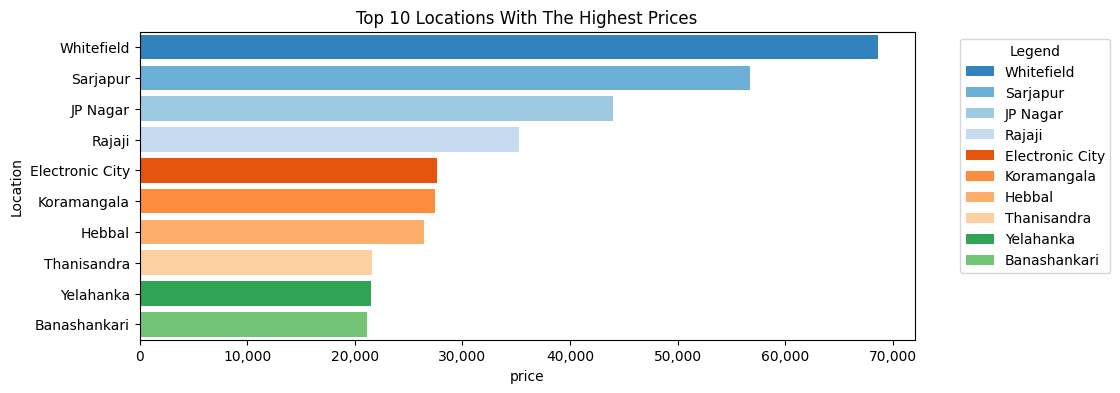

In [26]:
# plot the chart
plt.figure(figsize=(10, 4))
plt.title('Top 10 Locations With The Highest Prices')
sns.barplot(data=locations_by_price_df,
            x='price',
            y='Location',
            hue='Location', # color
            palette=sns.color_palette('tab20c', len(locations_by_price_df)),
            legend='brief',
            saturation=1.0)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # display values in this format '100,000'
plt.show()

The top 10 locations with the highest prices per square feet are Whitefield, Sarjapur, JP Nagar, Rajaji, Electronic, Koramangala, Hebbal, Thanisandra, Yelahanka, and Banashankari. Whitefield is the highest with **₹68,586.00** and it is followed by Sarjapur which is the second highest with ₹56,741.34. 

The chart shows a huge contrast in price between  Whitefield and other places. Whitefield’s high price suggests it is a premium location, probably driven by its amenities, connectivity, proximity to major IT hubs, or infrastructure. On the other hand, Banashankari holds the lowest price among the top 10 locations at ₹21,332.53, representing a more budget-friendly option.

**Key Metrics:**
- _**Highest Price:**_ Whitefield (_₹68,586.00_)
- _**Lowest Price:**_ Banashankari (_₹21,332.53_)

<br>

**Observations:**
- Whitefield's high price per square foot indicates a potential hotspot for luxury developments.
- Sarjapur, and JP Nagar offer relatively lower prices than Whitefield while still being in high-demand areas. These locations may balance affordability and accessibility for buyers.
- Locations like Thanisandra, Yelahanka, and Banashankari, with lower prices, may be attractive for buyers looking for more affordable options.

###### <font size=2>**Total Properties Per Area Type.**</font>

In [27]:
# Group by area_type, count the location, sort the values, create a dataframe for the data
locations_by_area_df = (df.groupby('area_type')['Location']
                        .count()
                        .sort_values(ascending=False)
                        .reset_index()
                        .head(10)
                        .rename(columns={'area_type':'area type', 'Location':'property count'})
                       )
locations_by_area_df.head(2)

,area type,property count
0,Super built-up Area,8254
1,Built-up Area,2394


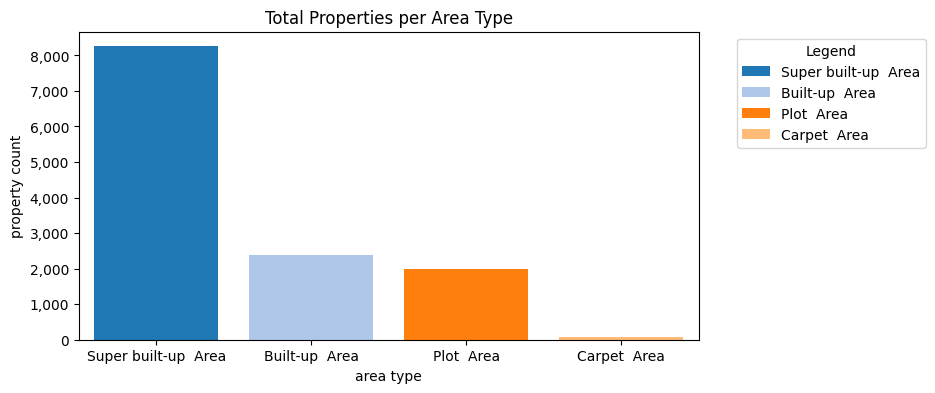

In [28]:
# plot the chart
plt.figure(figsize=(8, 4))
plt.title('Total Properties per Area Type')
sns.barplot(data=locations_by_area_df,
            x='area type',
            y='property count',
            hue='area type', # color
            palette=sns.color_palette('tab20', len(locations_by_area_df)),
            legend='brief',
            saturation=1.0)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # display values in this format '100,000'
plt.show()

Super built-up Area is the area with the highest quantity of properties (8,271 locations), followed by Built-up Area with 2,396 locations, Plot Area with 1,989 locations, and finally, Carpet Area with just 87 locations.

This indicates that Super built-up Area properties are the most commonly available and likely reflect a pricing strategy that includes shared spaces like lobbies, corridors, and other amenities in the total area calculation. Carpet Area, with its minimal presence, suggests that properties calculated purely on usable space might command premium pricing or target niche buyers.

**Key Metrics:**
- _**Most Common Area Type:**_ Super built-up Area (8,271 locations)
- _**Least Common Area Type:**_ Carpet Area (87 locations)

<br>

**Observations:**
- The high number of Super built-up areas suggests that properties with this area type may offer more competitive pricing per square foot.
- Built-up Area and Plot Area may provide a balance between price and usable space, appealing to buyers who prioritize private living space without paying a premium for shared amenities.
- Carpet Area properties, while limited in number, might command higher prices per square foot due to the emphasis on actual usable space. These could represent high-end or niche housing options.

###### <font size=2>**Correlation Between Features**</font>

In [29]:
# features
num_cols = ["price_sqft", "rooms", "total_sqft", "bath", "balcony", "price"]
num_matrix = (df[num_cols]
              .corr()
              .sort_values(
                  'price', 
                  ascending=False
                  )
              )
num_matrix

,price_sqft,rooms,total_sqft,bath,balcony,price
price,0.027922,0.394323,0.048512,0.450392,0.123129,1.000000
bath,0.030536,0.896804,0.052601,1.000000,0.204048,0.450392
rooms,0.030541,1.000000,0.053897,0.896804,0.190478,0.394323
balcony,0.009408,0.190478,0.008596,0.204048,1.000000,0.123129
total_sqft,-0.002143,0.053897,1.000000,0.052601,0.008596,0.048512
price_sqft,1.000000,0.030541,-0.002143,0.030536,0.009408,0.027922


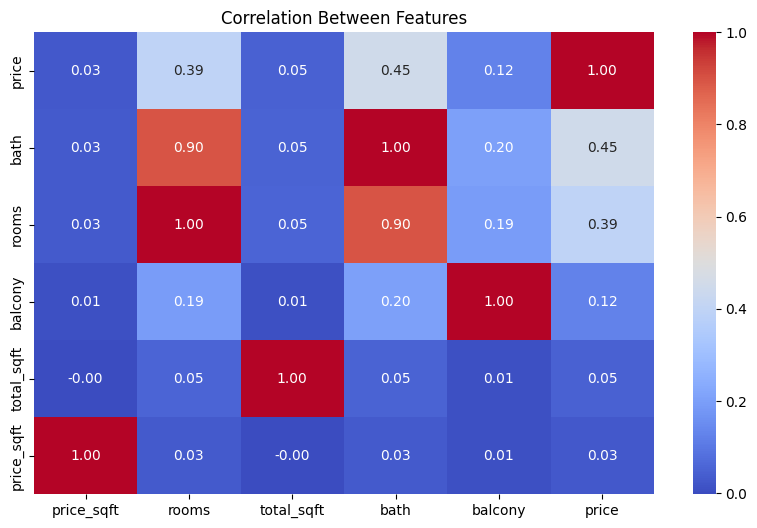

In [30]:
# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=num_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f"
           )
plt.title("Correlation Between Features")
plt.show()

The dataset examines the relationships between price_sqft, rooms, total_sqft, bath, balcony, and price, and provides insights into how the features influence prices. From the heatmap, it is clear that there is a strong positive correlation between Bath and Rooms (_0.90_), and Price and Bath (_0.45_), which suggests that properties with more bathrooms tend to have larger sizes, and higher prices. There is a weak correlation between price per square foot and features like rooms (_0.03_), bath (_0.03_), and balcony (_0.01_), and a negative correlation with total_sqft (_-0.00_), which means that total square footage does not have a huge influence on the price per square foot.

**Key Metrics:**
- **Strongest Correlation:** Bath and rooms (0.90)
- **Weakest Correlation:** price_sqft and total_sqft (-0.00)
- **Feature comparison**
    - **Price_Sqft vs. Rooms:** Correlation of _0.03_ suggests a negligible relationship, indicating that the size of the converted area has minimal influence on the price per square foot.
    - **Rooms vs. Price:** Correlation of _0.39_ shows a moderately positive correlation, suggesting that larger converted areas are associated with higher property prices.
    - **Rooms vs. Balcony:** Correlation of 0.19 indicates a relatively weak positive correlation, which means that larger converted areas may not  have balconies.
    - **Total Sqft vs. Price:** Correlation of 0.05 shows a very weak positive correlation, suggesting that properties with larger total converted square footage barely increases house prices.
    - **Price vs. Balcony:** Correlation of 0.12 demonstrates a weak positive correlation, meaning that properties with balconies may have higher prices.
    - **Price_Sqft vs. Rooms:** Correlation of 0.03 suggests a negligible relationship, indicating that the size of the converted area has little effect on the price per square foot.
    - **Price_Sqft vs. Total_Sqft:** Correlation of -0.00 shows a very weak negative relationship.
    - **Price_Sqft vs. Balcony:** Correlation of 0.01 suggests a negligible positive relationship, indicating that balconies barely affect the price per square foot.
    - **Price_Sqft vs. Price:** Correlation of 0.03 demonstrates a slight positive relationship, pointing to a very weak association between price per square foot and the overall property price.

<br>

**Observations:**
- More bathrooms are a key feature of larger homes.
- Larger homes generally cost more but may not necessarily command higher prices per square foot.
- Both size of the converted area and total converted square footage have a moderate positive correlation with property price, suggesting that larger converted spaces contribute to higher property values.
- The price per square foot shows minimal correlations with almost all the other variables, which means that it may not be a significant factor in determining property prices in this dataset.

###### <font size=2>**Average Property Size By Area Type**</font>

In [31]:
# Group by Location, average the size, sort the values, create a dataframe for the data
avg_sqft_location_df = (df.groupby('area_type')['rooms']
                        .mean()
                        .sort_values(ascending=False)
                        .reset_index()
                        .rename(columns={'area_type':'area type', 'rooms':'average size'})
                       )
avg_sqft_location_df

,area type,average size
0,Plot Area,4.062532
1,Built-up Area,2.798663
2,Carpet Area,2.666667
3,Super built-up Area,2.526896


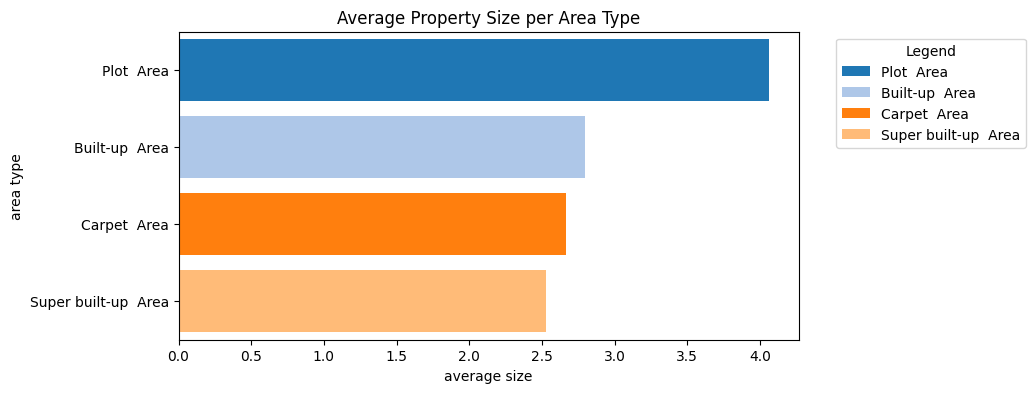

In [32]:
# plot the chart
plt.figure(figsize=(8, 4))
plt.title('Average Property Size per Area Type')
sns.barplot(data=avg_sqft_location_df,
            y='area type',
            x='average size',
            hue='area type', # color
            palette=sns.color_palette('tab20', len(avg_sqft_location_df)),
            legend='brief',
            saturation=1.0)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Plot Area has the largest average size of 4.06 units, followed by Built-up Area, which averages 2.80 units, Carpet Area with an average size of 2.67 units, and Super built-up Area has the smallest average size of 2.53 units. The results of Plot Area in terms of size suggests that it is typically associated with spacious properties, such as standalone homes or vacant plots, while Super built-up Area likely includes shared spaces, resulting in relatively smaller private areas.

**Key Metrics:** \
_**Largest Average Size:**_ Plot Area (4.06 units)\
_**Smallest Average Size:**_ Super built-up Area (2.53 units)

<br>

**Observations:**
- Properties with Plot Area are suited to buyers who need spacious layouts or larger plots for future development.
- Built-up and Carpet areas balance size and practicality, which makes those areas suitable for buyers seeking for houses with efficient use of space.
- Super built-up Area properties would appeal to buyers who value shared amenities and more affordable options.

###### <font size=2>**Distribution Of Area Types By Location**</font>

In [33]:
# identify the 10 most popular locations
popular_locations = (df.groupby('Location').size().reset_index(name='Count')
                     .sort_values('Count', ascending=False).head(10))

# Extract information for only the top 10 locations from the dataframe
top_locations = df[df['Location'].isin(popular_locations['Location'])]

# Group the area_type and top 10 locations, and calculate the total locations
top_location_area_df = (top_locations.groupby(['area_type', 'Location']).size()
                        .reset_index(name='Count').sort_values(['area_type','Count'], ascending=False)
                        .rename(columns={'area_type':'Area Type'}))

top_location_area_df.head(2)

,Area Type,Location,Count
33,Super built-up Area,Whitefield,362
31,Super built-up Area,Sarjapur,348


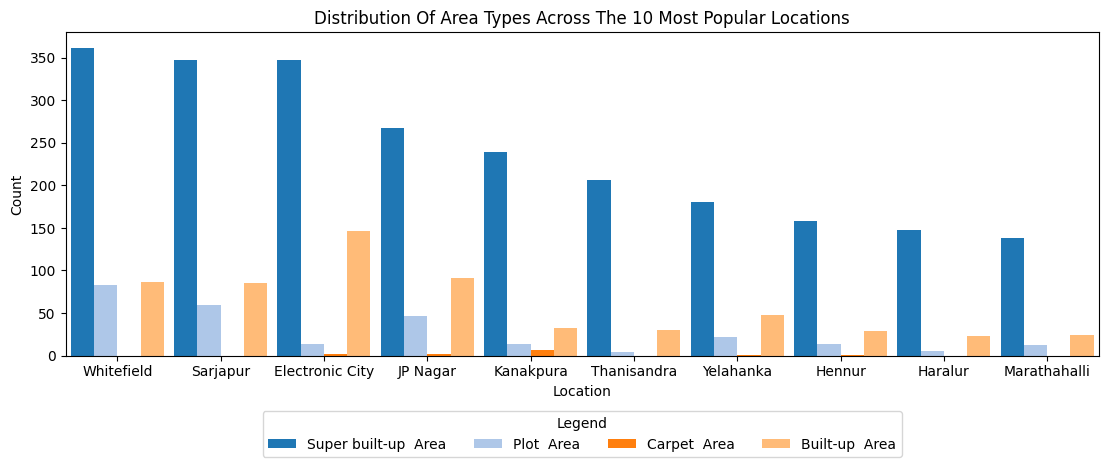

In [34]:
# Plot the clustered bar chart
plt.figure(figsize=(12, 5))
plt.title('Distribution Of Area Types Across The 10 Most Popular Locations')
sns.barplot(data=top_location_area_df,
            y='Count',
            x='Location',
            hue='Area Type',
            width=0.9,
            palette=sns.color_palette('tab20', len(top_location_area_df['Area Type'].value_counts())),
            saturation=1.0
           )
plt.tight_layout(pad=4.0)
plt.legend(title="Legend", loc='upper center', bbox_to_anchor=(0.5, -0.15),
    ncol=len(top_location_area_df['Area Type'].value_counts())# // 2  # Number of columns
)

From the data, it is clear that the Super built-up Area significantly outnumbers all the other area types. **Whitefield** has the highest count with **362 Super built-up Area properties**, followed closely by Sarjapur (_348 properties_) and Electronic City (_347 properties_). **Built-up Area** is the next most prominent area type amongst the locations,  with **Electronic City** having the highest count of 148 Built-up areas, followed by JP Nagar (_91_), and Whitefield (_87_). **Plot Area** comes in as the third most common area type, with **Whitefield** having the highest (_83_) count of plot area properties. **Carpet Area** has the smallest representation, with very few properties in all the top locations.

**Key Metrics:**
- _**Highest Count:**_ Super built-up Area in Whitefield (_362 properties_)
- _**Lowest Count:**_ Carpet Area in Yelahanka, and Hennur (_1 property each_)
  
<br>


**Observations:**
- Locations like Whitefield, Electronic City, and Sarjapur, with high counts of Super built-up Area properties, could be ideal for buyers who prioritize apartments with shared amenities.
- Built-up Area and Plot Area properties, though fewer in number, may appeal to buyers looking for standalone homes or land for development.
- Carpet Area properties may be ideal for buyers with highly specific space requirements.

###### <font size=2>**Availability Dates And House Prices Per Square Feet Over Time**</font>

In [35]:
# extract month (use name of months)
df['month'] = df['availability'].dt.month.astype(str).map({str(i): calendar.month_name[i] for i in range(1, 13)}) 

# initialize list with time periods
time_periods = ['month']

# initialize object to store preiod
results = {}

# iterate and group data per period
for period in time_periods:
    time_data = (df.groupby(period).agg(
                     availability_count=('availability', 'count'),  # availability count
                     average_price_sqft=('price_sqft', 'mean')  # average price per square feet
    ).reset_index())
    
    # scale the availability counts & prices to a common scale (0-1)
    time_data['scale_availability'] = time_data['availability_count']/time_data['availability_count'].max()
    time_data['scale_price'] = time_data['average_price_sqft']/time_data['average_price_sqft'].max()
    
    
    # melt the dataframe into 1 column
    period_melted = (time_data.melt(id_vars=period,value_vars=['availability_count','average_price_sqft'],
                                    var_name='Metric',value_name='Value'))
    
    # store the results
    results[period] = period_melted

time_data.sort_values(by='average_price_sqft', ascending=False).head(2)

,month,availability_count,average_price_sqft,scale_availability,scale_price
10,October,90,9158.047667,0.008333,1.000000
2,December,10800,8353.815645,1.000000,0.912183


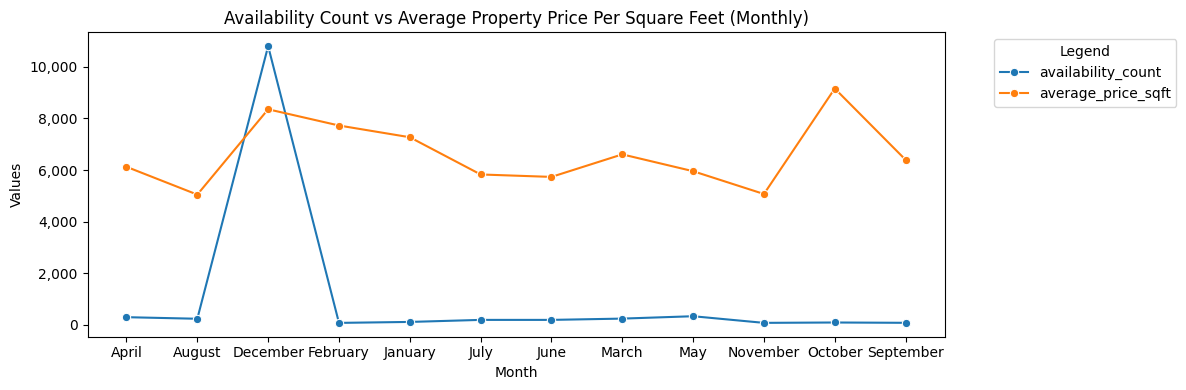

In [36]:
for period, data in results.items():
    plt.figure(figsize=(12, 4))
    sns.lineplot(
        data=data,
        x=period,
        y='Value',
        hue='Metric',
        marker='o'
    )
    plt.title(f'Availability Count vs Average Property Price Per Square Feet ({period.capitalize()}ly)')
    plt.xlabel(period.capitalize())
    plt.ylabel('Values')
    plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # display values in this format '100,000'

    plt.tight_layout()
    plt.show()

The comparison of the availability dates and average house prices per square foot revealed certain trends over time (monthly).

**Monthly Trends**\
The month with the highest amounts of availabe dates is December with **10,821** available properties, followed by May (333 properties) and April (296 properties), while February has the least available dates, with 75 properties. The line chart shows the constant variability in prices across the months. October has the highest average price per square foot of **₹9,158.05/sqft**, with December (₹8,355) and February (₹7,725) following closely. February (75 properties) is the month with the lowest availability and the lowest Average Price per square feet occured in August (₹5,043.26/sqft).


**_Date  Availability_**
- Highest: 
    - December: 10,821 properties
- Lowest:
    - February: 75 properties

**_Average House Prices_**
- Highest:
    - October: ₹9158.05/sqft
- Lowest:
    - August: ₹5,043.26/sqft
 
**Insights**
- Average price per square foot has steadily risen over the years, which could reflect market growth, or increased property values.
- December consistently shows the highest availability across the region.
- August and November are the months with the the lowest prices, which would be a good time to purchase houses in the area.

###### <font size=2>**Amentities Distribution Across Locations**</font>

In [37]:
# Group by 'new location', limit to the top 5 locations, calculate size, bath and balconies, sort the values, and create a dataframe for the data
location_amenities_df = (df.groupby('Location')[['bath', 'balcony']]
                          .sum().sort_values(by='bath', ascending=False)
                          .reset_index().head(5)
                         )

# reshape data into a long format for clustered bars
location_amenities_df = (location_amenities_df.melt(id_vars='Location',var_name='Amenity',value_name='Count'))

location_amenities_df.head(2)

,Location,Amenity,Count
0,Whitefield,bath,1447.0
1,Sarjapur,bath,1338.0


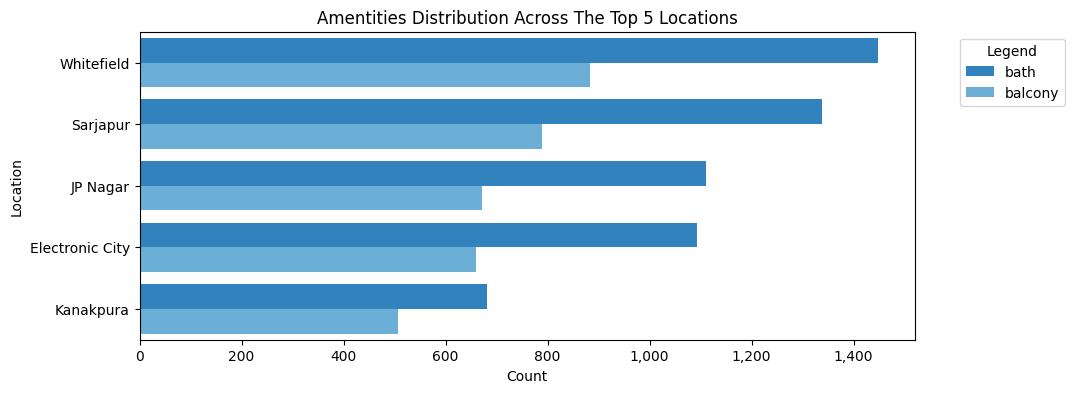

In [38]:
# Plot the clustered bar chart
plt.figure(figsize=(10, 4))
plt.title('Amentities Distribution Across The Top 5 Locations')
sns.barplot(data=location_amenities_df,
            y='Location',
            x='Count',
            hue='Amenity', 
            palette=sns.color_palette('tab20c', len(location_amenities_df['Amenity'].value_counts())), 
            saturation=1.0)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) # display values in this format '100,000'
plt.show()

The comparison of amenities across the top 5 most popular locations shows that Whitefield is the location with the highest amount of amenities (bathrooms (1447), and balconies (884). Sarjapur and JP Nagar follow, offering significant amenities with 1338 bathrooms and 789 balconies for Sarjapur and 1113 bathrooms and 673 balconies for JP Nagar. Electronic City Road and Kanakpura road have relatively fewer amenities but still provide competitive options for buyers.

**Key Metrics:**
- **Most Bathrooms:** Whitefield (1447)
- **Most Balconies:** Whitefield (884)
- **Fewest Bathrooms:** Kanakpura (687)
- **Fewest Balconies:** Kanakpura (511)

<br>

**Observations:**
- Whitefield remains an ideal choice for buyers seeking properties with abundant amenities, such as multiple bathrooms and balconies.
- Electronic City and JP Nagar offer balanced options for buyers looking for slightly lower amenity counts at potentially reduced prices.
- Sarjapur provides a competitive balance of bathrooms and balconies, making it suitable for mid-range buyers.

#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="removal-of-outliers">Removal Of Outliers</div>**

The first step was identifying the columns with outliers, and this was done using boxplots to view the distribution of the numerical columns in the dataset. A boxplot can be used for identifying outliers because it visually summarizes the distribution of data. 

##### **Identify Columns With Outliers**

rows in df: 12718


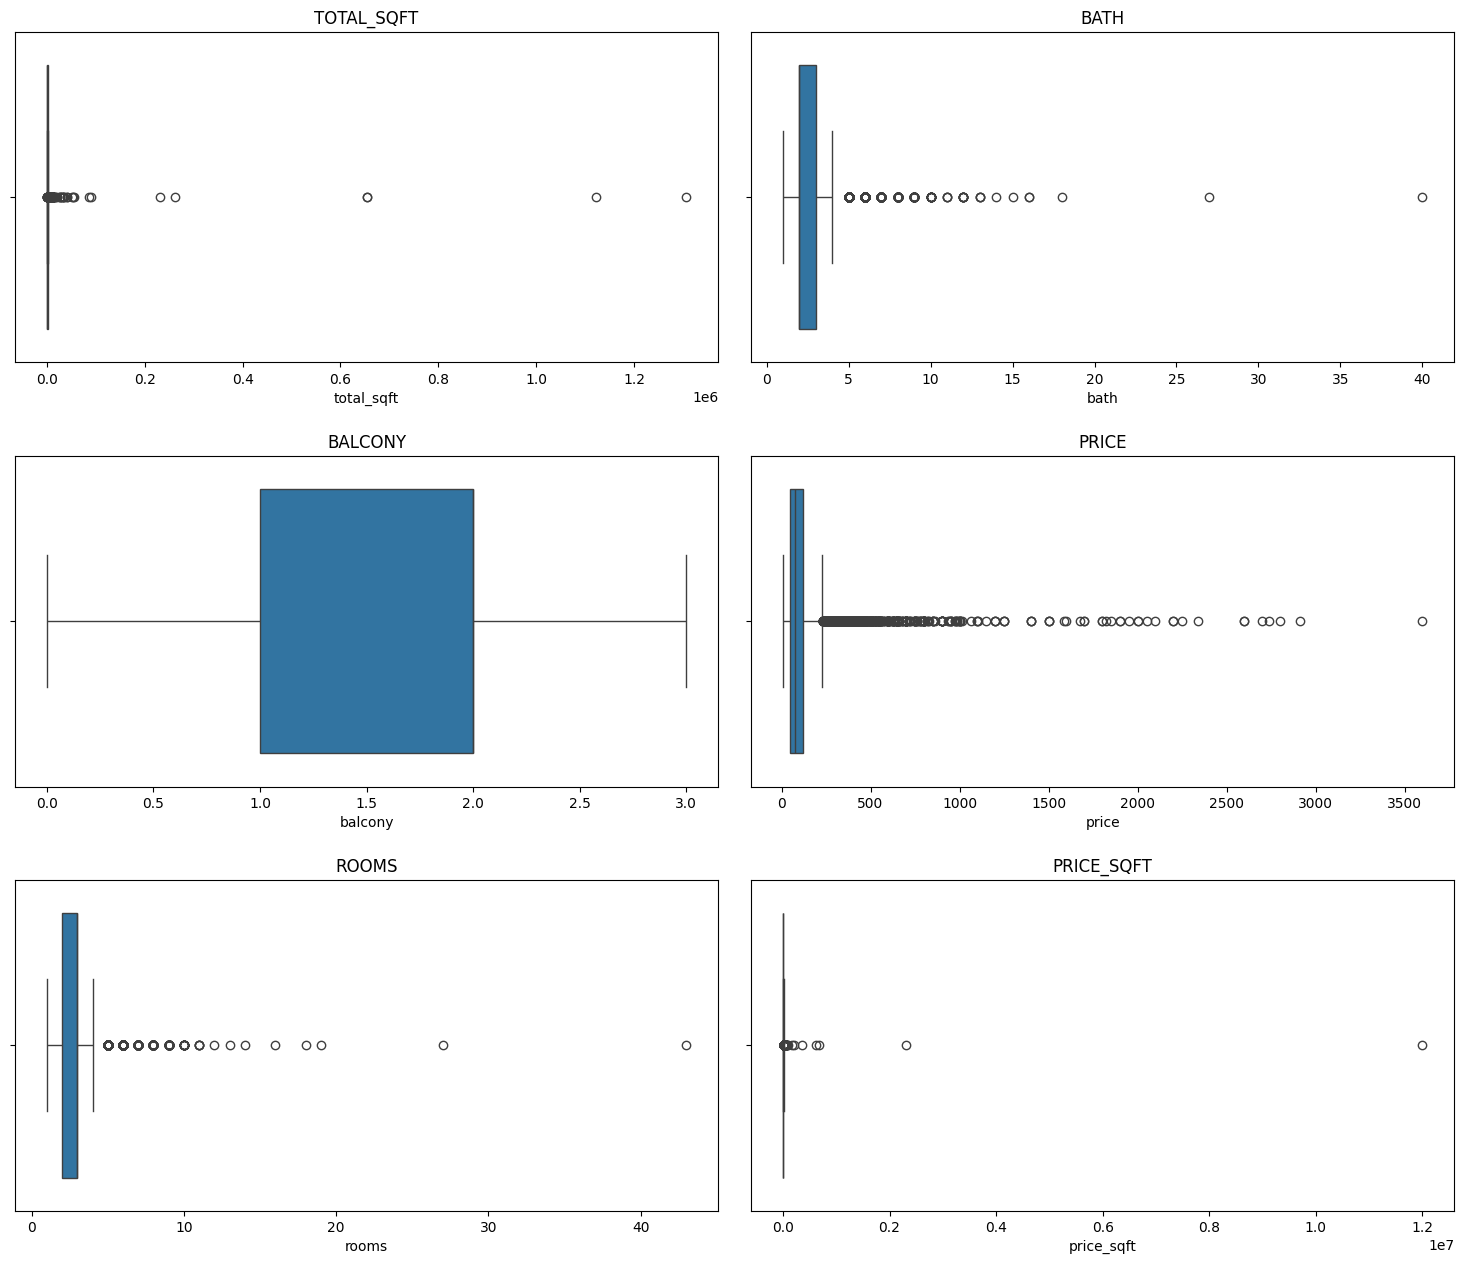

In [39]:
# extract numerical columns dynamically
columns = df.select_dtypes(include='number').columns

# generate titles for each column
titles = [f"{str.upper(col)}" for col in columns]

# grid size for subplots
rows, cols = 3, 2

# create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 13))

# flatten axes 
axes = axes.flatten()

print(f'rows in df: {df.shape[0]}')
for col, title, ax in zip(columns, titles, axes):
    sns.boxplot(
        data=df[col],
        orient='h',
        ax=ax
    ) 
    ax.set_title(title)
    ax.set_xlabel(col) 

plt.tight_layout(pad=2.0)
plt.show()

The figures above show that several columns have outliers. The presence of outliers can skew the results of the analysis, and the methods used to identify and remove the outliers were:
- Remove outliers manually by setting thresholds based on logic or industry knowledge.
- Extract outliers using methods such as interquartile range.

##### **Manual Removal Method**

For the manual removal process, a mix of business logic and industry research was performed to identify information such as the typical number of bedrooms, baths, square footage for different sized properties and prices across Bengaluru.

Based on this research, some of the criteria used to identify possible outliers include: 
- **Bath:**
    - A property of 43 bathrooms is extreme for Bengaluru. The minimum is 1, with maximum of 9.
    - Properties with a high bath to bed ratio can be potential outliers (for example, 14 bathrooms for a "Plot area" with 9 bedrooms).
    - Properties with bedrooms but 0 bathrooms.
- **Bedrooms:**
    - Properties with 9 or more bedrooms are uncommon unless they are hotels, guest houses, or mansions.
    - 3 bedroom properties with 1000 sqft or less.
- **Total Square Footage:**
    - For 6+ Bedroom properties, the range is from  3000+ sqft to 10000 sqft (i.e 7 Bedrooms with 950 sqft. is unrealistic).
    - Properties with square footage of less than 500 or over 10000 sqft.
- **Price_Sqft:** Similarly, the price_sqft ranges from an average of 2000 to 25000.
    -  4 or 5 bed property with price per sqft less than 3500 or greater than 15000
    -  400 sqft property with price per sqft less than 3000 or greater than 8750

###### <font size=2>**Remove Outliers (Manual)**</font>

- Identify the outliers based on the conditions specified.
- Create new dataframe without the outliers.

In [40]:
# define thresholds & conditions for outliers
outliers = df[
    (df['bath'] > (df['rooms'] * 2)) | (df['bath'] == 0) & (df['rooms'] > 0) |  
    (df['rooms'] >= 6) & ((df['total_sqft'] < 3000) | (df['total_sqft'] > 10000)) |
    (df['total_sqft'] == 400) & ((df['price_sqft'] < 3000) | (df['price_sqft'] > 8750)) | 
    (df['rooms'].isin([4, 5])) & ((df['price_sqft'] < 3500) | (df['price_sqft'] > 15000)) |
    (df['rooms'].isin([6, 7, 8])) & ((df['price_sqft'] < 3000) | (df['price_sqft'] > 8000)) |
    (df['total_sqft'] > 10000) | (df['rooms'] > 3) & (df['total_sqft'] < 1000) | (df['rooms'] >= 9) |
    (df['bath'] >= 9) | (df['total_sqft'] < 500) | (df['price_sqft'] < 3000) | (df['price_sqft'] > 50000)
]

# drop outliers from the original dataframe
df1 = (df.drop(outliers.index)
       .reset_index(drop=True)
      )

print(f'''
Original data: {df.shape[0]}
Total Outliers removed: {df.shape[0] - df1.shape[0]}
Data without outliers: {df1.shape[0]}
''')

df1.sample(2)


Original data: 12718
Total Outliers removed: 1507
Data without outliers: 11211



,area_type,availability,size,total_sqft,bath,balcony,price,rooms,price_sqft,Location,month
5738,Super built-up Area,2024-12-18,2 BHK,1200.0,2.0,2.0,79.55,2,6629.17,Thubarahalli,December
6152,Super built-up Area,2024-12-18,3 BHK,1717.0,3.0,3.0,120.00,3,6988.93,Plantation,December


###### <font size=2>**Visualizing With Boxplots (Manual Removal)**</font>

Boxplots were used to visualize the spread in data in the original dataset, before and after outliers were removed. First step was visualizing the numerical columns to identify the columns with outliers.

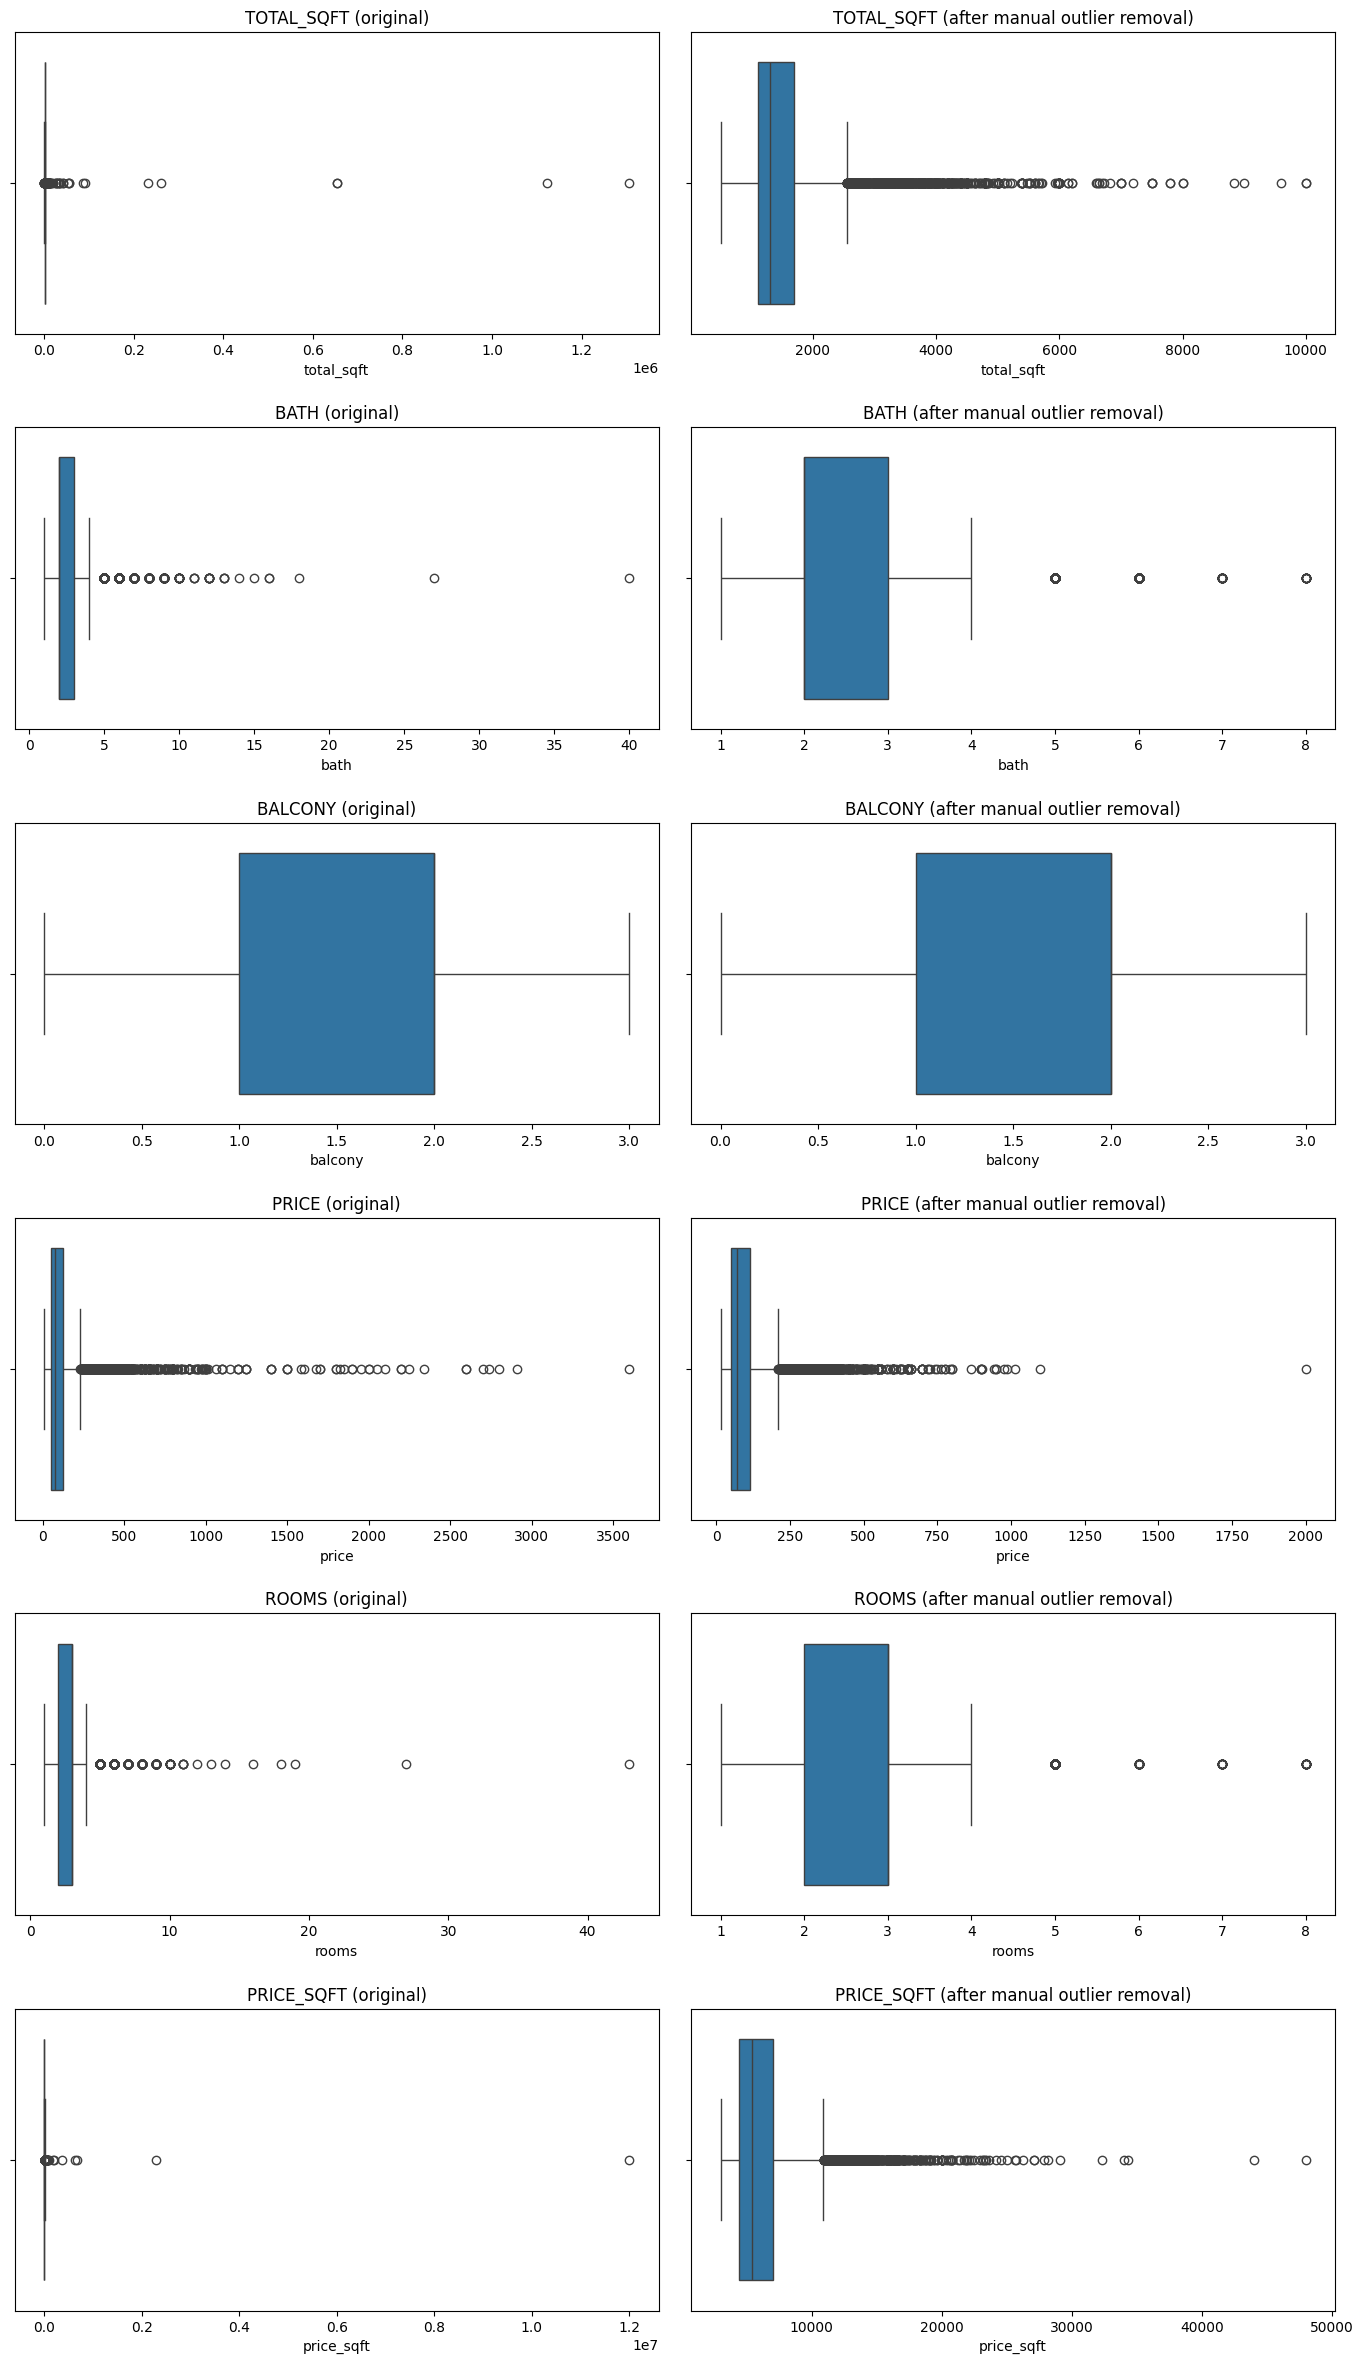

In [41]:
# extract numerical columns dynamically
num_columns = df1.select_dtypes(include='number').columns

# initialize lists
columns, titles = [], []

# interleave columns and titles directly
for col in num_columns:
    columns.extend([df[col], df1[col]]) # add column data alternately
    titles.extend([f"{str.upper(col)} (original)", 
                   f"{str.upper(col)} (after manual outlier removal)"]) # add titles

# grid size (6 rows, 2 columns)
rows, cols = 6, 2

# create 2 boxplots(subplots) side by side
fig, axes = plt.subplots(rows, cols, figsize=(14, 24))

# flatten axes 
axes = axes.flatten()

for col, title, ax in zip(columns, titles, axes):
    sns.boxplot(
        data=col,
        orient='h',
        ax=ax
    ) 
    ax.set_title(title) 

plt.tight_layout(pad=2.0)
plt.show()

**Interpretation**\
The manual approach involved setting manual thresholds based on average house prices and removing outliers accordingly.

*Observations*
- After filtering, the dataset contained 11,229 rows.
- Improvements on the distribution are visible in some columns, when compared to original columns.
- There are still outliers in the data so further cleaning is required.
- This method doesn't fully account for the skewness in the data, and keeping high outliers can distort the predictions.

##### **IQR (Interquartile Range) Removal Method**

The Interquartile Range (IQR) is a measure of statistical dispersion, representing the middle 50% of the data. It is calculated as:

**$$
\Large {\text{IQR}} = {\text{𝑄3 − 𝑄1}}
$$**

*Where:*

𝑄1: The 25th percentile (the value below which 25% of the data falls).\
𝑄3: The 75th percentile (the value below which 75% of the data falls).


The IQR focuses solely on the central portion of the data, and it ignores extreme values (outliers). Outliers are those that are 1.5 × IQR from Q1 or Q3. This method is preferred for skewed data because percentiles are not affected by extreme values.

###### <font size=2>**Remove Outliers (IQR)**</font>

- Calculate the upper and lower bounds for each column.
- Identify and remove the outliers
- Create new dataframe without the outliers.

In [42]:
# numerical columns
cols = df1.select_dtypes(include='number').columns

# store outliers and track outlier index
outliers_dict = {}
outlier_indices = set()

for col in cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_iqr = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    
    outliers_dict[col] = outliers_iqr[col].tolist() # store outliers
    outlier_indices.update(outliers_iqr.index) # add row number to the set to avoid repetition

# drop outliers
df2 = df1.drop(outlier_indices).reset_index(drop=True)

print(f'''
Original data: {df1.shape[0]}
Outliers to remove: {len(outlier_indices)}
Data remaining after removing outliers: {df2.shape[0]}
''')

df2.sample(2)


Original data: 11211
Outliers to remove: 1741
Data remaining after removing outliers: 9470



,area_type,availability,size,total_sqft,bath,balcony,price,rooms,price_sqft,Location,month
143,Super built-up Area,2024-12-18,2 BHK,1200.0,2.0,2.0,60.00,2,5000.0,Marathahalli,December
578,Super built-up Area,2024-12-18,2 BHK,735.0,2.0,1.0,57.99,2,7889.8,Kundalahalli,December


###### <font size=2>**Visualizing With Boxplots (IQR)**</font>

The boxplot shows the interquartile ranges (IQR), which contains the middle 50% of the data (from the 25th percentile to the 75th percentile. Boxplots were used to visualize the spread in data in the original dataset, before and after outliers were removed.

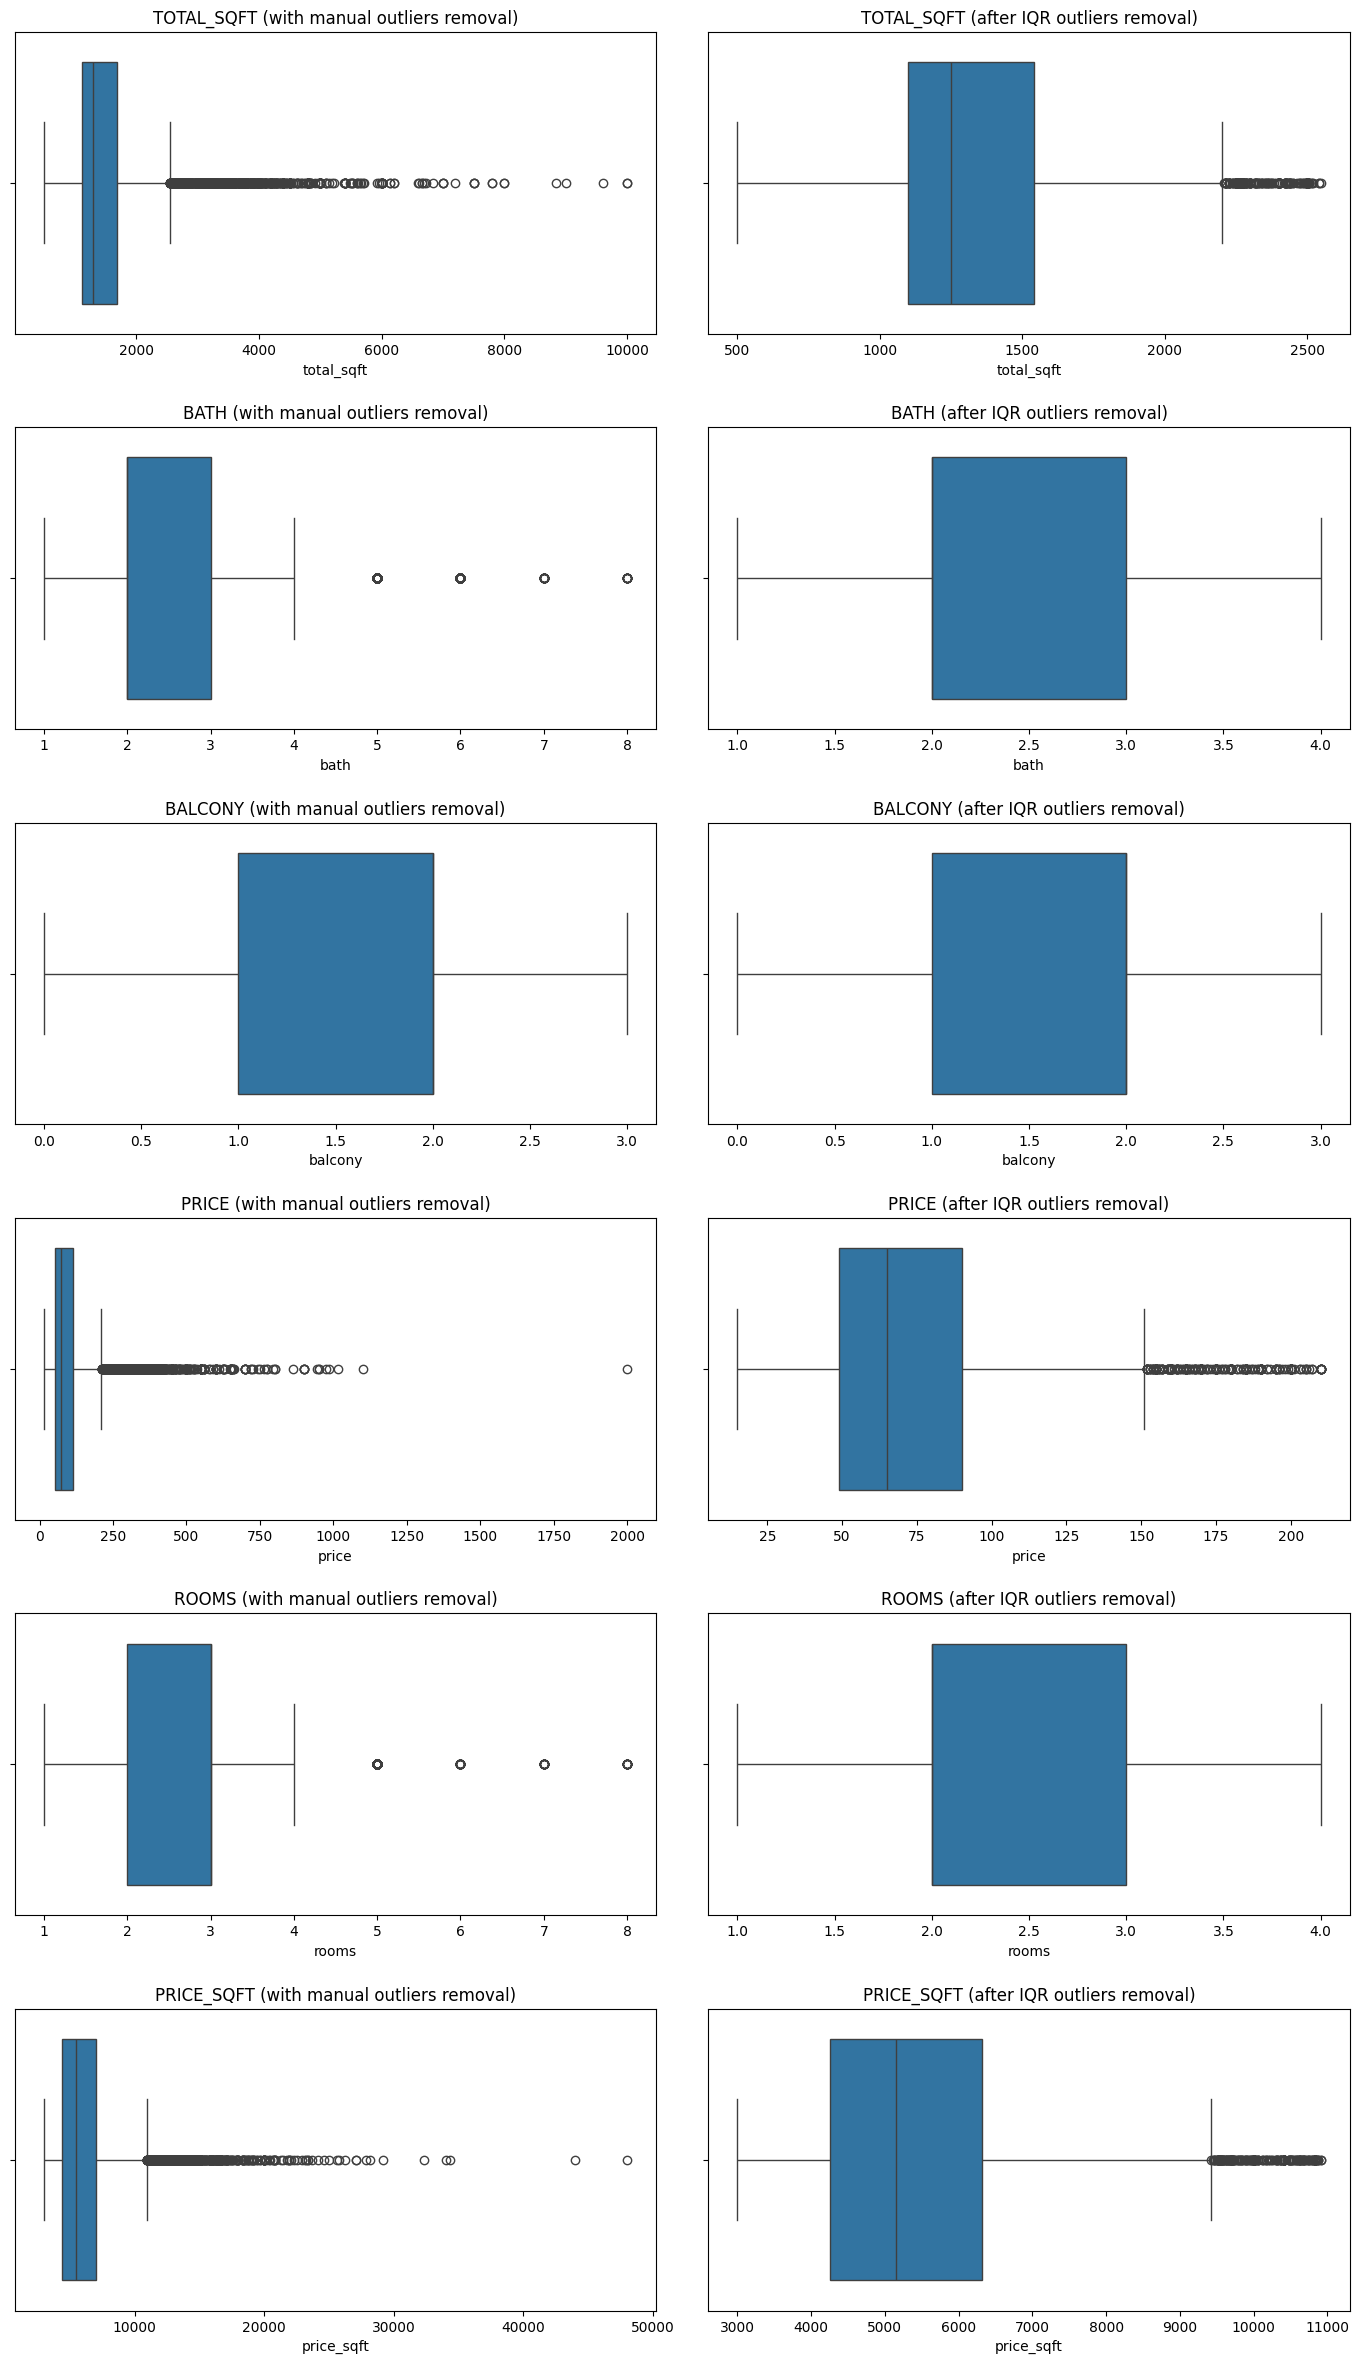

In [43]:
# extract numerical columns
num_columns = df2.select_dtypes(include='number').columns

# initialize lists
columns, titles = [], []

# interleave columns and titles directly
for col in num_columns:
    columns.extend([df1[col], df2[col]]) # add column data alternately
    titles.extend(
        [f"{str.upper(col)} (with manual outliers removal)", 
         f"{str.upper(col)} (after IQR outliers removal)"]
    ) # add titles

# grid size (6 rows, 2 columns)
rows, cols = 6, 2

# create 2 boxplots(subplots) side by side
fig, axes = plt.subplots(rows, cols, figsize=(14, 24))

# flatten axes 
axes = axes.flatten()

for col, title, ax in zip(columns, titles, axes):
    sns.boxplot(
        data=col,
        orient='h',
        ax=ax
    ) 
    ax.set_title(title) 

plt.tight_layout(pad=2.0)
plt.show()

**Interpretation**\
This approach involved used the IQR method to filter outliers from the dataset after the manual outlier removal was performed. 

**Observations**
- After filtering, the dataset contained 9987 rows (a reduction of about 9% from the original).
- The price column, total square feet and price per square feet showed very minor differences, when compared to the original dataset.
- There is a significant reduction in values in the price per sqft column.
- This method effectively reduced the skewness and variability in the data, making it more suitable for predictive modeling, compared to the manual approach.

##### **Remove Redundant Columns**

Once outliers are removed, drop columns that are irrelevant for building the predictive model. Dropping these features improves the model performance by reducing noise and preventing the model from focusing on misleading patterns.

- Use correlation to determine the most important numerical columns.
- Remove unimportant categorical columns i.e. month

In [44]:
# numerical columns
nums = df2.select_dtypes(include='number')

# nums with correlation to price > 0.7
price_corr = nums.corr()['price'][nums.corr()['price'].abs() > 0.7].sort_values(ascending=False)

# remove columns that aren't named 'Location' and have correlation less than 0.7
if not price_corr.empty:
    remove = [
        col for col in df2.columns
        if col != 'Location' and col not in price_corr.index
    ]
    df2.drop(remove, axis=1, inplace=True)
    print('Redundant columns removed 👍🏻')
else:
    print("Columns not in dataframe")

df2.sample(2)

Redundant columns removed 👍🏻


,total_sqft,price,price_sqft,Location
2451,1520.0,103.0,6776.32,Vijaya
6679,1800.0,93.0,5166.67,Electronic City


#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="building-the-prediction-model">Building The Prediction Model</div>**

The process of building the model involved several key steps:

1.  Data preparation.
2.  Data splitting.
3.  Fit the models.
4.  Validate / evaluate the models.
5.  Identify the best model.
6.  Combine the training and validation data.
7.  Evaluate with the test set.
8.  Storing the Model.

##### **Data Preparation**

Identify the features and target
- Features (X): These are the input variables or predictors (e.g., square footage, number of rooms, etc.) used to predict the target.
- Target (y): This is the variable to be predicted (price).

In [45]:
# remove the target column from the remaining features
X = df2.drop(columns=['price'])
y = df2['price'] # target

print(f'''
X (Features):\n{X.sample(2)}\n
y (Target):\n{y[:2]}
''')


X (Features):
      total_sqft  price_sqft     Location
3807       938.0     3731.34  Uttarahalli
8083      1737.0     3299.94      Varthur

y (Target):
0    39.07
1    62.00
Name: price, dtype: float64



##### **Data Splitting**

The dataset was split into three parts: training, validation, and testing. Initially, the data was split into 60% for training and 40% for a temporary set, then, the temporary set was split in half, creating a 20% validation set and a 20% test set. This method helps to prevent overfitting, where the model performs well on the training data but badly on unseen data. 
 
- Training Set (X_train, y_train):
    - This is 60% of the data is used to train/teach the model
    - This helps it to learn patterns and relationships between the features (inputs) and the target (output).
- Validation Set (X_val, y_val):
    - This set is 20% of the data, and it was used to fine-tune the model and find the best settings.
    - It was also used to evaluate different the regression models (i.e. Lasso regression) and their performance on the data.
- Test Set (X_test, y_test):
    - This remaining 20% is used for the final evaluation of the model.
    - It provides an unbiased estimate of the model's performance on completely new data, giving a realistic idea of how the model will do in the real world.

In [46]:
# split the dataset into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# split temporary set into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'''
X train total: {X_train.shape[0]}\n{X_train.sample()}\n
X val total: {X_val.shape[0]}\n{X_val.sample()}\n
X test total: {X_test.shape[0]}\n{X_test.sample()}\n\n
y train total: {len(y_train)}\n{y_train[:1]}\n 
y val total: {len(y_val)}\n{y_val[:1]}\n 
y test total: {len(y_test)}\n{y_test[:1]}\n
''')


X train total: 5682
      total_sqft  price_sqft         Location
5690      1116.0     3584.23  Electronic City

X val total: 1894
      total_sqft  price_sqft  Location
6597      1861.0     4943.58  Panathur

X test total: 1894
      total_sqft  price_sqft    Location
7608      1760.0     9090.91  Whitefield


y train total: 5682
568    98.88
Name: price, dtype: float64
 
y val total: 1894
1794    43.5
Name: price, dtype: float64
 
y test total: 1894
872    38.0
Name: price, dtype: float64




##### **Fit The Models**

- Data preprocessing:
    - Scaling numerical features (e.g., using StandardScaler).
    - Encoding categorical features (e.g., using OneHotEncoder).
- Model selection.
- Model training / tuning:
    - Train the model on X_train and y_train to learn the relationships between the features and the target.
    - Use techniques like GridSearchCV to train the data with different models and tune hyperparameters (e.g., number of trees, depth of trees, regularization strength, etc.) to find the model configuration that performs best.

###### <font size=2>**Data Preprocessing**</font>

This involved changing raw data into a format that works better for analysis, and improves the accuracy of predictions. During this step, the features were identified and processed based on their datatypes (numeric and categorical). 

- **Encoding categorical data:**
  Encoding is the process of converting categorical (text) data into numerical data that can be processed by machine learning algorithms. Machine learning models can’t work with text-based categories directly, and there are several methods to transform the data, such as, target encoding, frequency encoding, one hot encoding, label encoding, to name a few.

  For this analysis, One-hot encoding was used to convert the categorical variables into numerical data. This technique creates separate binary columns for each category within a variable, where 1 indicates the presence of that category and 0 indicates its absence.
  
    *columns to encode (object datatype)*
    - Area_type column (4 unique area types).
    - Location column (664 unique locations). 
    

- **Scaling numerical data**
This simply means adjusting the values to ensure they are within a similar range. Without scaling, features with larger values (i.e. price_sqft) would overshadow the smaller ones like 'bath', which could lead to biased results. For this analysis, the numeric features were scaled using a technique called standard scaling.

    *columns to scale (int64 & float64 datatypes)*
    - Total_sqft
    - Bath
    - Balcony
    - Rooms
    - Price_sqft

In [47]:
# select columns based on the datatype (numeric & categorical)
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# specify preprocessing step for the columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

###### <font size=2>**Model Selection**</font>

A variety of machine learning models, each with different settings (hyperparameters), were used to identify the most effective model for predicting the house prices. These models were chosen because they offer a good balance of accuracy, ease, and suitability for the given dataset. 

- Random Forest Regressor: Handles nonlinear relationships and interactions well, which are common in house pricing data.
- Ridge Regression: Ideal for datasets with multicollinearity, ensuring stable and interpretable predictions.
- SVR (Support Vector Regressor): Excellent for capturing both linear and nonlinear patterns in data.
- Linear Regression: A basic model that works well as a baseline when relationships are linear.
- Lasso Regression: Useful for feature selection when dealing with numerous predictors, helping to focus on the most relevant variables.
- XGBRegressor: A gradient-boosted tree model designed for speed and performance.

The Hyperparameters are like the settings that control the behavior of the modeland how it learns and makes predictions. Just like a radio, the right hyperparameter values can significantly improve a model's accuracy, for example the number of trees hyperparameter on the random forest regressor model controls its accuracy - more trees mean higher accuracy but increased training time.


In [48]:
# hyperparameters
n_estimators = [100, 200, 300]
max_depth = [10, 20, None]
alpha = [0.1, 1.0, 10.0]
kernel = ['linear', 'poly', 'rbf']
c_val = [0.1, 1, 10]
learning_rate = [0.01, 0.1, 0.3]

# models
models = {
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {'model__n_estimators': n_estimators,
                   'model__max_depth': max_depth}
    },
    'Ridge': {
        'model': Ridge(), 
        'params': {'model__alpha': alpha}
    },
    'SVR': {
        'model': SVR(), 
        'params': {'model__C': c_val, 
                   'model__kernel': kernel}
    },
    'XGBRegressor': {
        'model': XGBRegressor(), 
        'params': {'model__n_estimators': n_estimators, 
                   'model__learning_rate': learning_rate,
                   'model__max_depth': max_depth}
    },
    'LinearRegression': {
        'model': LinearRegression(), 
        'params': {}
    },
    'Lasso': {
        'model': Lasso(), 
        'params': {'model__alpha': alpha}
    }
}

###### <font size=2>**Model Training / Tuning**</font>

This step involes the the process of training, and evaluating the different machine learning models. It iterates through the models, preprocessing (scaling and encoding), and utilising the GridSearchCV technique, which is used to find the best hyperparameters per model. GridSearchCV tries out different combinations of hyperparameter values and selects the combination that results in the best performance on the training data. Each model is trained on the training data using the best hyperparameters found by GridSearchCV, and predictions are made on the test data. 

In [49]:
# store trained models and results
trained_models = {}
model_results = []

for name, config in tqdm(models.items(), desc="Model Tuning Process"):  # show progress bar
    print(f"\nTraining and tuning {name}...")

    # processing steps (encoding, scaling)
    modeling_steps = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])
    
    # grid search
    grid_search = GridSearchCV(
        estimator=modeling_steps,
        param_grid=config['params'],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    # train the model
    grid_search.fit(X_train, y_train)

    # store train results
    model_results.append(
        {
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Best Score': grid_search.best_score_
        }
    )
      
    # save trained models
    trained_models[name] = grid_search

print("\nTraining completed for all models ✅.\n")

# create test results dataframe
train_results_df = pd.DataFrame(model_results)
train_results_df

Model Tuning Process:   0%|                                                                      | 0/6 [00:00<?, ?it/s]


Training and tuning RandomForestRegressor...


Model Tuning Process:  17%|██████████▏                                                  | 1/6 [06:13<31:09, 373.87s/it]


Training and tuning Ridge...


Model Tuning Process:  33%|████████████████████▎                                        | 2/6 [06:14<10:17, 154.39s/it]


Training and tuning SVR...


Model Tuning Process:  50%|███████████████████████████████                               | 3/6 [06:48<04:58, 99.36s/it]


Training and tuning XGBRegressor...


Model Tuning Process:  67%|████████████████████████████████████████▋                    | 4/6 [11:47<05:56, 178.30s/it]


Training and tuning LinearRegression...


Model Tuning Process:  83%|██████████████████████████████████████████████████▊          | 5/6 [11:48<01:54, 114.10s/it]


Training and tuning Lasso...


Model Tuning Process: 100%|█████████████████████████████████████████████████████████████| 6/6 [11:48<00:00, 118.13s/it]


Training completed for all models ✅.



,Model,Best Params,Best Score
0,RandomForestRegressor,"{'model__max_depth': None, 'model__n_estimators': 200}",-1.022452
1,Ridge,{'model__alpha': 10.0},-33.214454
2,SVR,"{'model__C': 10, 'model__kernel': 'rbf'}",-11.630847
3,XGBRegressor,"{'model__learning_rate': 0.1, 'model__max_depth': None, 'model__n_estimators': 300}",-1.284712
4,LinearRegression,{},-36.566604
5,Lasso,{'model__alpha': 0.1},-33.783462


##### **Validate / Evaluate The Models**

After performing the GridSearchCV on the training set (X_train, y_train), the validation set is used to evaluate the performance of the best models and hyperparameters found during grid search.  
The code reports the best hyperparameters, MSE, RMSE, and R-squared (R²) for each model.
- Mean Squared Error (MSE) measures the average squared difference between the predicted and the actual target values within a dataset. It shows how far the predicted values differ from the actual values.
- The Root Mean Squared Error (RMSE) is the square of the MSE. It measures the average difference between the values predicted by a model and the actual values.
- R² is a measure of how well the model explains the variance in the target variable. The results, including the best parameters and metrics, are stored and printed for each model.

The lower the MSE or RMSE, and the higher the R², the better the model.

In [50]:
# Store validation results and predictions
validation_predictions = {}
validation_results = []

# Validate models
for name, grid_search in trained_models.items():
    # predict using the validation set
    val_predictions = grid_search.predict(X_val)
    
    # evaluate metrics
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, val_predictions)
    
    # store prediction results
    validation_results.append(
        {
            'Model': name,
            'Best Params': grid_search.best_params_,
            'Best Score': grid_search.best_score_,
            'Validation MSE': val_mse,
            'Validation RMSE': val_rmse,
            'Validation R2': val_r2
        }
    )
    
    # save predictions
    validation_predictions[name] = val_predictions

print("Prediction completed for all models ✅.\n")

# create validation results dataframe
validation_results_df = pd.DataFrame(validation_results)
validation_results_df

Prediction completed for all models ✅.



,Model,Best Params,Best Score,Validation MSE,Validation RMSE,Validation R2
0,RandomForestRegressor,"{'model__max_depth': None, 'model__n_estimators': 200}",-1.022452,0.963206,0.981430,0.999212
1,Ridge,{'model__alpha': 10.0},-33.214454,36.086389,6.007195,0.970471
2,SVR,"{'model__C': 10, 'model__kernel': 'rbf'}",-11.630847,11.226134,3.350542,0.990814
3,XGBRegressor,"{'model__learning_rate': 0.1, 'model__max_depth': None, 'model__n_estimators': 300}",-1.284712,0.880808,0.938514,0.999279
4,LinearRegression,{},-36.566604,39.299951,6.268967,0.967842
5,Lasso,{'model__alpha': 0.1},-33.783462,37.114562,6.092172,0.969630


###### <font size=2>**Visualizing The Results**</font>

To visualize how efficient the models are, a scatter plot was used to view how well each model's predicted values (y_pred) match the actual values (y_test). A reference line showing where the predicted values equal the actual values, was added to the chart. The closer the points are to the reference line, the better the model's performance.

- Loop through each model and use the pipeline to make predictions.
- Store the predictions and actual values for plotting.
- Create scatter plots for each model.

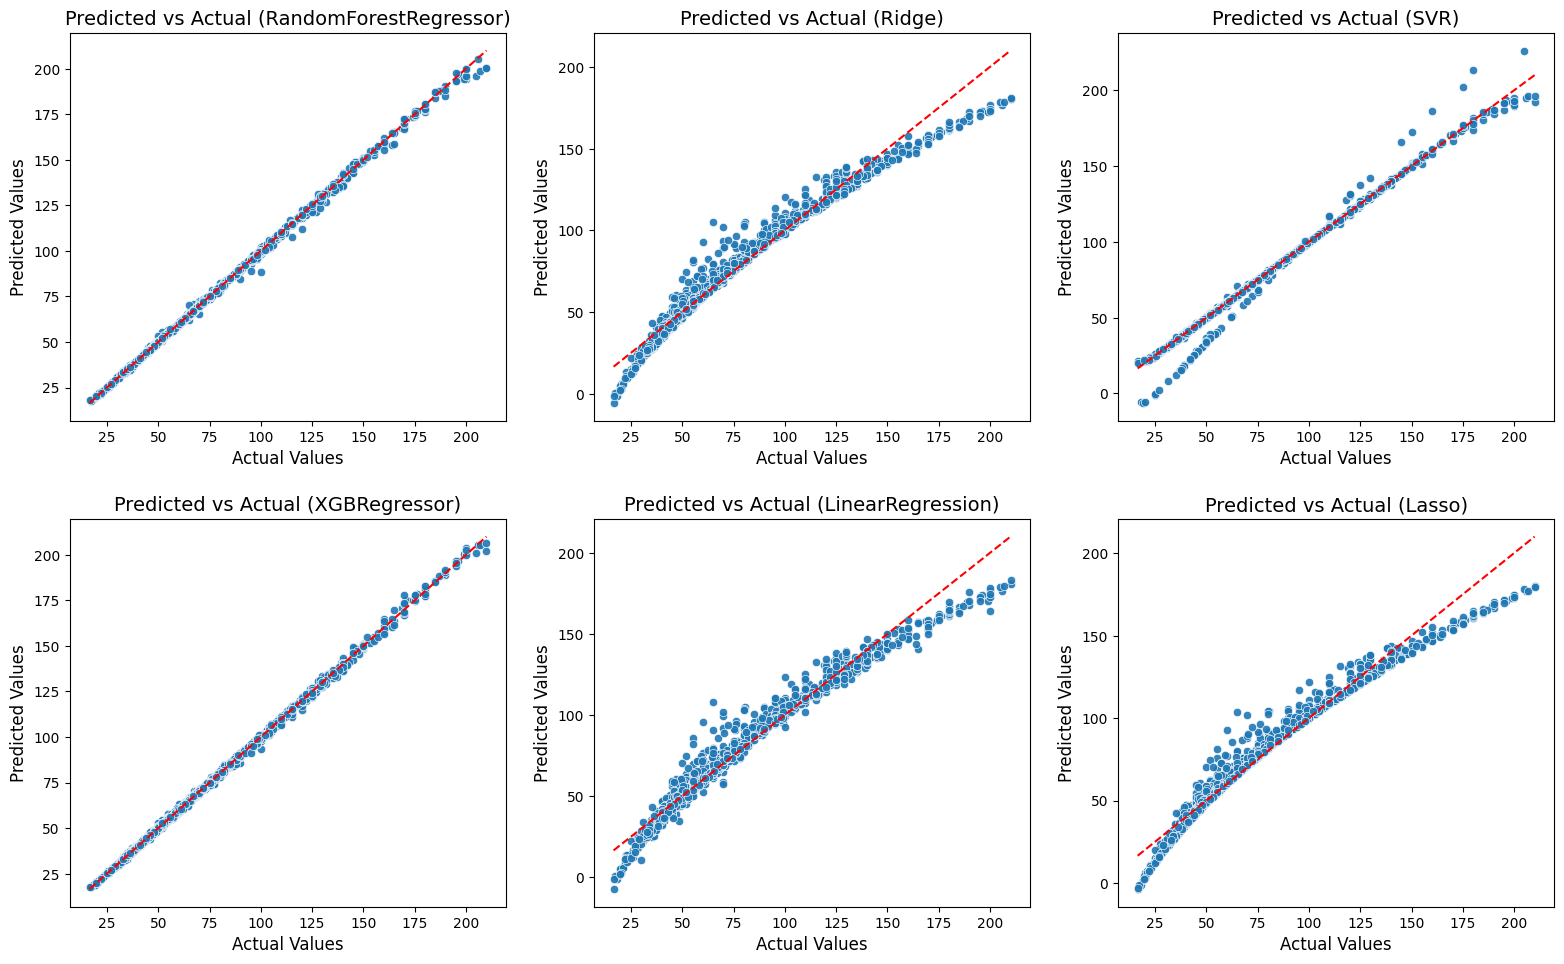

In [51]:
# plot the chart
plt.figure(figsize=(16, 10))
for i, (model_name, val_predictions) in enumerate(validation_predictions.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_val,
                    y=val_predictions,
                    alpha=0.9
                   )
    plt.plot(
        [y_val.min(), y_val.max()], 
        [y_val.min(), y_val.max()], 
        'r--'
    ) 
    
    plt.title(f'Predicted vs Actual ({model_name})', size=14)
    plt.xlabel('Actual Values', size=12)
    plt.ylabel('Predicted Values',size=12)
    
plt.tight_layout(pad=2.0)
plt.show()

##### **Identify The Best Model**

After the validation, the best performing model is selected based on the results of the evaluation. It retrieves the different models with their hyperparameters from the validation results, compares their individual MSE, RMSE and R² scores, and chooses the one with the best performance (i.e., the lowest MSE, the highest R² or the highest score) as the best model.

In [52]:
# fetch the best model
model_data = max(validation_results, key=lambda x: x['Best Score']) # fetch model with highest score from validation_results
top_model = models[model_data['Model']]['model'].__class__(
    **{key.removeprefix('model__'): # remove prefix "model__" in front of hyperparameter
       value for key, 
       value in model_data['Best Params']
       .items()}
)

print(f"""
Name: {type(top_model).__name__}
Params: {top_model.get_params()}
""")


Name: RandomForestRegressor
Params: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}



##### **Refit With The Training And Validation Data**

Once the best performing model was identified, the training (X_train, y_train) and validation sets (X_val, y_val) were combined to create a larger training dataset. 

During GridSearch cross validation, the model is repeatedely trained on separate fractions of the data and evaluated to find the best combination of hyperparameters, so although fitting was performed during the initial GridSearchCV process, refitting was performed to provide a larger dataset for training. Training a model with a larger dataset increases the performance of the model, allowing it to learn, and make more accurate predictions. 

- Merge the training and validation data.
- Refit the best model on the combined data.

In [53]:
# combine training and validation data
X_final = pd.concat([X_train, X_val], axis=0)
y_final = np.concatenate((y_train, y_val), axis=0)

# pipeline with the best model
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', top_model)         
])

# refit with the pipeline (best model & preprocessing steps)
best_model.fit(X_final, y_final)

best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['total_sqft', 'price_sqft'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Location'], dtype='object'))])),
                ('model', RandomForestRegressor(n_estimators=200))])

#####  **Evaluate With The Test Set**

Once the best model is fitted with the combined set (X_final, y_final), the test set is used to evaluate the performance of the best model found during grid search.  This is a check to ensure the model's performance is not just good on the training data but also on new, unseen data. This provides an estimate of how accurate the model is and how well it will perform on real-world data

The code reports the best hyperparameters, MSE, RMSE, and R-squared (R²) for each model.
- Predict the model with the test set (X_test, y_test).
- Mean Squared Error (MSE) measures the average squared difference between the predicted and the actual target values within a dataset. It shows how far the predicted values differ from the actual values.
- The Root Mean Squared Error (RMSE) is the square of the MSE. It measures the average difference between the values predicted by a model and the actual values.
- R² is a measure of how well the model explains the variance in the target variable. The results, including the best parameters and metrics, are stored and printed for each model.

The lower the MSE or RMSE, and the higher the R², the better the model.

In [54]:
# Predict on the test set
test_preds = best_model.predict(X_test)

# Evaluate metrics
test_mse = mean_squared_error(y_test, test_preds)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_preds)

print(f"""
TEST METRICS
Test MSE: {test_mse}
Test RMSE: {test_rmse}
Test R²: {test_r2}
""")


TEST METRICS
Test MSE: 0.69591282002904
Test RMSE: 0.8342138934524167
Test R²: 0.9994197130114015



###### <font size=2>**Visualizing The Results**</font>

To visualize how efficient the models are, a scatter plot was used to view how well the predicted values (y_pred) matched the actual values (y_test). A reference line showing where the predicted values equal the actual values, was added to the chart. The closer the points are to the reference line, the better the model's performance.

- Use the pipeline to make predictions.
- Store the predictions and actual values for plotting.
- Create scatter plots for each model.

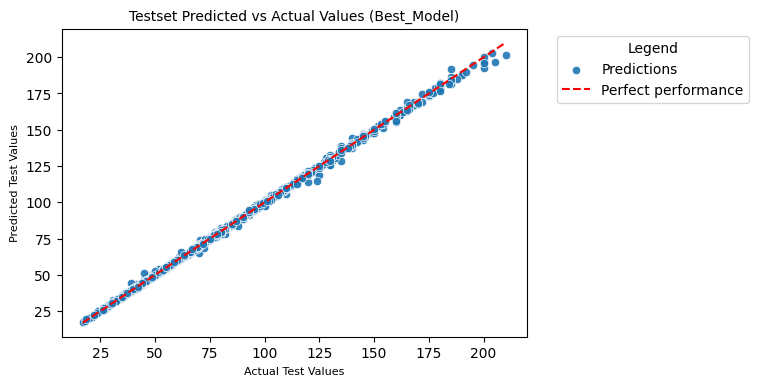

In [55]:
# Plot the chart
plt.figure(figsize=(6, 4))

# predicted vs. actual values
scatter_plot = sns.scatterplot(
    x=y_test,  # actual values
    y=test_preds,
    alpha=0.9,
    label='Predictions'
)

# prediction line
line_plot, = plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    label='Perfect performance'
)

plt.xlabel('Actual Test Values', size=8)
plt.ylabel('Predicted Test Values', size=8)
plt.title(f'Testset Predicted vs Actual Values (Best_Model)', size=10)
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

##### **Store The Model**

It is a good practice to save machine learning models after they have been trained. Saving a machine learning model (including any processing steps) allows it to be used for predictions, making it easier to deploy, share, and reuse over time. It removes the need to constantly retrain the model, and ensures that the results gotten from analysis are reproducible and consistent.

- Saving the model in a specific format (i.e. joblib, pkl) for future use.

In [56]:
# store the pipeline
joblib.dump(best_model, 'models/bengalaru_pred_model.joblib')
print("model saved successfully!")

model saved successfully!


#### **<div style="font-variant: small-caps; color: blue;display: inline-block;" id="predictions">Predictions</div>**

Using a machine learning model involves applying it to analyze data and make decisions. After training, the model processes inputs and generates outputs like classifications, predictions, or recommendations based on its purpose. This process has two main steps:

- Load the model
- Make predictions (on test data)

##### **Load The Model**

In [57]:
# read the model
pred_model = joblib.load('models/bengalaru_pred_model.joblib')
print('model loaded successfully 👍🏻')

model loaded successfully 👍🏻


##### **Predict With Model**

A prediction function was developed using the saved model and the features utilized during the model-building process. The function accepts the following inputs:

- location (str): Name of the location.
- price_sqft (float): Price per square foot.
- total_sqft (float): Total area in square feet (default: 1500.0).

In [58]:
# function to predict house prices at specific locations
def predict_price(location,total_sqft,price_sqft):
    """
    Predict the house prices, with location-specific handling for any missing features.

    Parameters:
    - location (str): Location name.
    - total_sqft (float, optional): Total square footage
    - price_sqft (float, optional): Price per square foot

    Returns:
    - float: Predicted price.
    """        
    input_data = pd.DataFrame(
        {
            'Location': [location],
            'total_sqft': [total_sqft],
            'price_sqft': [price_sqft]
            
        }
    )
    # predict using the model
    prediction = pred_model.predict(input_data)
    
    return round(prediction[0], 2)

###### <font size=2>**Fetch Test Data**</font>

In [59]:
X_test.sample()

,total_sqft,price_sqft,Location
1995,920.0,6847.83,Whitefield


###### <font size=2>**Make Predictions**</font>

In [60]:
# test a sample (from the x_test) with actual values
print(f"""
Predicted Price: {predict_price('Akshaya',1314.0,5235.92)}
Actual price: {round(
    df2[(df2['Location']=='Akshaya') & 
    (df2['total_sqft'] == 1314.0) & 
    (df2['price_sqft'] == 5235.92)]['price'].mean(),2)}
""")


Predicted Price: 68.73
Actual price: 68.8



In [61]:
# test a sample (from the x_test) with actual values
print(f"""
Predicted Price: {predict_price('Chikkalasandra',1230,3902.44)}
Actual price: {round(
    df2[(df2['Location']=='Chikkalasandra')
    & (df2['total_sqft'] == 1230)
    & (df2['price_sqft'] == 3902.44)]['price'].mean(),2)}
""")


Predicted Price: 47.99
Actual price: 48.0



In [62]:
# test a sample (from the x_test) with estimated values
print(f"""
Predicted Price: {predict_price('Kaggadasapura',1500,4000)}
Actual price: {round(
    df2[(df2['Location']=='Kaggadasapura') & 
    (df2['total_sqft'] == 1495) & 
    (df2['price_sqft'] == 4013.38)]['price'].mean(),2)}
""") # compare against the actual location values


Predicted Price: 60.03
Actual price: 60.0



In [63]:
# test a sample (from the x_test) with estimated values
print(f"""
Predicted Price: {predict_price('Sarjapur',2300,8300)}
Actual price: {round(
    df2[(df2['Location']=='Sarjapur') & 
    (df2['total_sqft'] == 2206) & 
    (df2['price_sqft'] == 8159.56)]['price'].mean(),2)}
""") # compare against the actual location values


Predicted Price: 187.46
Actual price: 180.0



**Observations**\
Based on the test metrics, the model demonstrates exceptional accuracy, achieving an R² value of 0.999, which suggests it effectively captures nearly all patterns in the data, when all required arguments are provided during prediction. This high performance was confirmed across various test cases. For example, for the location, **Akshaya**, with a price per square foot of _`5235.92 Sq/ft`_ and total area of _`1314.0 Sq/ft`_, the predicted price was _**`68.73`**_, which was slightly different (0.7) from the actual price of _**`68.8`**_. 

However, when predictions are made using estimated values (location, total_sqft & price_sqft) from the test data, the accuracy can vary significantly depending on how much the estimates differ from the actual values. For example, in the case of **Sarjapur**. The estimated total_sqft was _`2300 Sq/ft`_, against the actual total_sqft of _`2206 Sq/ft`_, and estimated price_sqft of _`8300 Sq/ft`_, whereas the actual price_sqft was _`817.56 Sq/ft`_. This resulted in a predicted price of _**187.46**_, compared to the actual price of _**180.0**_